In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv('movies_metadata.csv',low_memory=False)

                                               Petit aperçu du dataset

In [3]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.info() # Okay, y a du travail 😅

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
# visualisation des colonnes qui ne s'affichaient pas avec le df.head()
df1=df[['popularity','poster_path','production_companies','production_countries']].copy()

In [7]:
df1 

,popularity,poster_path,production_companies,production_countries
0,21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o..."
1,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o..."
2,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o..."
3,3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o..."
4,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o..."
...,...,...,...,...
45461,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]"
45462,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]"
45463,0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o..."
45464,0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]"


                                            Traitement des données

In [8]:
df['adult'].value_counts()

adult
False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64

In [9]:
df=df[df['adult']=='False'] # on ne prend que les film classé adult==False.
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [10]:
df['adult'].unique()

array(['False'], dtype=object)

In [11]:
df['adult'].isnull().sum()

np.int64(0)

In [12]:
df.loc[:,'adult']=df['adult'].map({'False':0}) # encodage de False en 0.

In [13]:
df['adult'].isnull().sum()

np.int64(0)

In [14]:
feature_left_aside=df[['adult','title','original_title']]
df=df.drop(['adult','title','original_title','imdb_id','tagline','overview','id'],axis=1)
# Le dataset 'feature_left_aside' contiendra les colonnes qui n'ont pas besoin de traitement pour réaliser notre système de recommandation.
# Cela permettra d'alléger l'excécution des cellules qui vont suivre.
# les colonnes 'tagline','overview' ,'id'et 'imdb_id' ne sont pas utiles pour le système de recommandation, pas pour celui qu'on fera en tous cas.

In [15]:
df['belongs_to_collection'][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [ ]:
df['belongs_to_collection'].isnull().sum() # le nombre de NaN ~ nombre de valeur. Vue son encodage, on va devoir supprimer cette colonne par manque d'info.

np.int64(40963)

In [17]:
feature_left_aside=pd.concat([feature_left_aside,df['belongs_to_collection']],axis=1)
del df['belongs_to_collection']

In [18]:
df['budget']=df['budget'].astype(float)
df['budget']

0        30000000.0
1        65000000.0
2               0.0
3        16000000.0
4               0.0
            ...    
45461           0.0
45462           0.0
45463           0.0
45464           0.0
45465           0.0
Name: budget, Length: 45454, dtype: float64

In [19]:
df.describe()['budget'] # il semble y avoir beaucoup de budget de 0.

count    4.545400e+04
mean     4.225399e+06
std      1.742576e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [20]:
df['budget'].value_counts()

budget
0.0            36565
5000000.0        286
10000000.0       259
20000000.0       243
2000000.0        242
               ...  
152000000.0        1
1500.0             1
82000.0            1
1282545.0          1
2153912.0          1
Name: count, Length: 1223, dtype: int64

In [ ]:
df['budget']=df['budget'].apply(lambda x: np.nan if x==0 else x) # Un budget de 0 est irréalisable, la valeur n'a sans doute pas été donnée.

In [22]:
df['budget'].isnull().sum()

np.int64(36565)

In [23]:
df['genres'][0] # Nous sommes en présence d'un dictionnaire stringifié.

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [24]:
import ast

In [25]:
df['genres']=df['genres'].apply(lambda x: ast.literal_eval(x))
# la méthode literal_eval de ast va évaluer l'objet tel qu'il est vraiment , c'est-à-dire en dictionnaire.

In [26]:
df['genres'][0] # nous avons à présent une liste de dictionnaire

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [27]:
df['genres'][0][0]['id']

16

In [28]:
df['genres'].isnull().sum()

np.int64(0)

In [ ]:
def empty_dico(row):
    if len(row['genres'])==0:
        return True
    return False 
#print('Nombre de dictionnaire vide pour genres:',df.apply(nimporte,axis=1).sum())
print(df[df.apply(empty_dico,axis=1)].describe()['vote_average'],'\n')
print(df.describe()['vote_average'],'\n')
print(df[df.apply(empty_dico,axis=1)].describe()['vote_count'],'\n')
print(df.describe()['vote_count'])

#La fonction va nous permettre de selectionner les lignes où un dictionnaire vide est renseigné dans la colonne genres.
# On fait par la suite une analyse de ces lignes en fonction d'autres colonnes en regardant le describe où il y a des dictionnaires vides et le describe général. 

count    2442.000000
mean        4.239435
std         3.069244
min         0.000000
25%         0.000000
50%         5.000000
75%         6.700000
max        10.000000
Name: vote_average, dtype: float64 

count    45451.000000
mean         5.618543
std          1.924085
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64 

count    2442.000000
mean        2.944308
std         9.940223
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       403.000000
Name: vote_count, dtype: float64 

count    45451.000000
mean       109.917538
std        491.356914
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64


In [ ]:
#def empty_dico(row):
#    if len(row['genres'])==0:
#        return True
#    return False 
#df.apply(empty_dico,axis=1).sum()

La colonne genres renferme des éléments précieux pour le système de recommandation notamment le nom des genres de film, nous allons les extraire afin d'attribuer un label d'appartenance à chaque ligne, les lignes qui auront le label 0 dans chaque colonne des différents genres seront des lignes qui avaient des dictionnaires vide.

In [31]:
collection_genre=[]
def collecte_genres(row):
    global collection_genre
    for element in row['genres']:
        if element['name'] not in collection_genre:
            collection_genre.append(element['name'])
    
df.apply(collecte_genres,axis=1)
print(collection_genre)
#La fonction va juste collecter les genres.

['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']


In [ ]:
def add_genre(row):
    for element in collection_genre:
        if any(genre['name']==element for genre in row['genres']):# est ce qu'il existe un genre parmis les row['genres'] dont le nom est égal à element? 
            row[element]=1
        else:
            row[element]=0
    return row

df=df.apply(add_genre,axis=1) # Le temps d'excécution peut être assez long.

In [33]:
feature_left_aside=pd.concat([feature_left_aside,df['genres']],axis=1)
del df['genres']

In [34]:
del df['homepage'] # On s'accorde à dire que ça ne sert pas ici.

In [35]:
df.head()

,budget,original_language,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,...,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
0,30000000.0,en,21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,0,0,0,0,0,0
1,65000000.0,en,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,0,0,0,0,0,0,0,0
2,NaN,en,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,0,0,0,0,0,0
3,16000000.0,en,3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,0,0,0,0,0,0
4,NaN,en,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,0,0,0,0,0,0


In [36]:
df[df['original_language'].isnull()]

,budget,original_language,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,...,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
19574,NaN,NaN,0.017007,/xT9csxMKYbizRQgvNzCXJ67R7er.jpg,"[{'name': 'StudioCanal', 'id': 694}, {'name': ...","[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'is...",2004-10-11,0.0,95.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",...,0,0,0,0,0,0,0,1,0,0
21602,NaN,NaN,0.359818,/vfaJuZF0ocVwBEDYZhoULGuVxrz.jpg,"[{'name': 'New Holland Pictures', 'id': 10229}...","[{'iso_3166_1': 'AU', 'name': 'Australia'}]",2007-08-04,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,0,0,0,0,0,0
22832,NaN,NaN,0.070647,/q5ADXvvzYtAOyrReIg1HckdPj62.jpg,"[{'name': 'Associated Producers (API)', 'id': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1960-03-31,0.0,69.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,1,0,0,0,1,0
32141,NaN,NaN,0.073418,/upQByEwY58sHWdL3RZm7kmRc44s.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1929-10-31,0.0,8.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,0,0,0,0,0,0
37407,NaN,NaN,0.036841,/12wf2EkrPGxNzRbNyoau8GIFp3M.jpg,"[{'name': 'Ceskoslovenský Státní Film', 'id': ...","[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'}]",1950-01-26,0.0,87.0,"[{'iso_639_1': 'cs', 'name': 'Český'}]",...,0,0,0,0,0,0,0,0,0,0
41047,NaN,NaN,0.373688,/6iJqscs2xQLKKvrTCWmlHd9rf3W.jpg,[],[],2015-11-13,0.0,82.0,"[{'iso_639_1': 'ur', 'name': 'اردو'}, {'iso_63...",...,0,0,0,0,0,0,0,1,0,0
41872,NaN,NaN,1.58434,/l7Lzvah6PL6vdMF5p0elKiyYqp9.jpg,"[{'name': 'Edison Manufacturing Company', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1895-04-01,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",...,0,0,0,0,0,0,0,1,0,0
44057,NaN,NaN,0.001283,/gk32ZWTYgfTXctEyCDAWeMcxo7X.jpg,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",2001-01-01,0.0,0.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",...,0,0,0,0,0,0,0,0,0,0
44410,NaN,NaN,0.067624,/olEOCEGTW15WBPC0UnmLjokrmNF.jpg,[],[],2016-03-12,0.0,76.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso...",...,0,0,0,0,0,0,0,1,0,0
44576,NaN,NaN,0.030766,/pErCRQoc3nt8lCsExd3fFYgyBox.jpg,[],"[{'iso_3166_1': 'AT', 'name': 'Austria'}]",2016-01-27,0.0,84.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",...,0,0,0,0,0,0,0,0,0,0


In [37]:
df['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [38]:
index1=df[df['original_language'].isnull()].index
language=['en','en','en','en','hi','en','en','fr','en','en','fr']
i=0
for l in language:
    df.loc[index1[i],'original_language']=l
    i+=1
# Nous avons observé production_countries et spoken_languages pour attribuer des valeurs à ces NaN,.

In [39]:
df[df['original_language'].isnull()]

,budget,original_language,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,...,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie


In [40]:
for language in df['original_language'].unique():
    print(language,':',df['original_language'].value_counts()[language])

en : 32272
fr : 2440
zh : 409
it : 1528
fa : 101
nl : 248
de : 1080
cn : 312
ar : 39
es : 993
ru : 826
sv : 384
ja : 1350
ko : 444
sr : 63
bn : 29
he : 67
pt : 316
wo : 5
ro : 57
hu : 100
cy : 1
vi : 10
cs : 130
da : 224
no : 106
nb : 6
pl : 219
el : 113
sh : 5
xx : 33
mk : 5
bo : 2
ca : 12
fi : 297
th : 76
sk : 9
bs : 14
hi : 509
tr : 150
is : 24
ps : 2
ab : 10
eo : 1
ka : 18
mn : 2
bm : 3
zu : 1
uk : 16
af : 2
la : 1
et : 24
ku : 3
fy : 1
lv : 18
ta : 78
sl : 17
tl : 23
ur : 8
rw : 1
id : 20
bg : 10
mr : 25
lt : 9
kk : 3
ms : 5
sq : 5
qu : 1
te : 45
am : 2
jv : 1
tg : 1
ml : 36
hr : 29
lo : 2
ay : 1
kn : 3
eu : 3
ne : 2
pa : 2
ky : 3
gl : 1
uz : 1
sm : 1
mt : 1
hy : 1
iu : 2
lb : 1
si : 1


Bon, on va faire la même chose qu'avec la colonne genres,  créer des colonnes pour les éléments de original_language, attribuer des labels à chaque ligne pour caractériser l'appartenance à ce groupe.

Il y a par contre un gros problème, l'excécution de la dernière cellule nous montre qu'il y a un grand nombre d'éléments dans spoken_languages, si on fait une colonne pour chaque élément, on sera vite surchargé. Fort heureusement, les éléments de spoken_languages ont une fréquence d'apparition très variée (32272 pour en et juste 1 pour si). 

On va alors faire des colonnes mais uniquement avec des éléments de spoken_languages qui apparaissent très souvent, on va fixer un seuil d'apparition (300 par exemple), si la fréquence d'apparition de l'élément de spoken_languages est supérieur à cette valeur, elle gagne le droit d'avoir sa propre colonne, si non , elle sera classifier dans une colonne 'other_languages'.

In [41]:
filtered_languages=[]
other_languages=[]
for language in df['original_language'].unique():
    if df['original_language'].value_counts()[language]>300:
        filtered_languages.append(language)
    else:
        other_languages.append(language)
print(filtered_languages,'\n','\n',other_languages) 

['en', 'fr', 'zh', 'it', 'de', 'cn', 'es', 'ru', 'sv', 'ja', 'ko', 'pt', 'hi'] 
 
 ['fa', 'nl', 'ar', 'sr', 'bn', 'he', 'wo', 'ro', 'hu', 'cy', 'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo', 'ca', 'fi', 'th', 'sk', 'bs', 'tr', 'is', 'ps', 'ab', 'eo', 'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv', 'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms', 'sq', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay', 'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu', 'lb', 'si']


In [42]:
def add_language (row):
    for language in filtered_languages:
        if row['original_language']==language:
            row[language]=1
        else:
            row[language]=0
    if row['original_language'] in other_languages:
        row['other_language']=1
    else:
        row['other_language']=0

    return row
df=df.apply(add_language,axis=1)

In [43]:
feature_left_aside=pd.concat([feature_left_aside,df['original_language']],axis=1)
del df['original_language']

In [44]:
df.head()

,budget,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,...,de,cn,es,ru,sv,ja,ko,pt,hi,other_language
0,30000000.0,21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,0,0,0,0,0,0,0,0,0,0
1,65000000.0,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,...,0,0,0,0,0,0,0,0,0,0
2,NaN,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,0,0,0,0,0,0,0,0,0,0
3,16000000.0,3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,0,0,0,0,0,0,0,0,0,0
4,NaN,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df['popularity']=df['popularity'].astype(float) # elle était renseignée en str.

In [46]:
df['popularity'].isnull().sum()

np.int64(3)

In [47]:
df[df['popularity'].isnull()]

,budget,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,...,de,cn,es,ru,sv,ja,ko,pt,hi,other_language
19729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
29502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
35586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df=df.dropna(subset=['popularity'])

In [49]:
df['popularity'].isnull().sum()

np.int64(0)

In [50]:
df.describe()['popularity'] # La colonne semble être très asymétrique.

count    45451.000000
mean         2.921765
std          6.005910
min          0.000000
25%          0.385945
50%          1.127613
75%          3.679334
max        547.488298
Name: popularity, dtype: float64

8.61941825


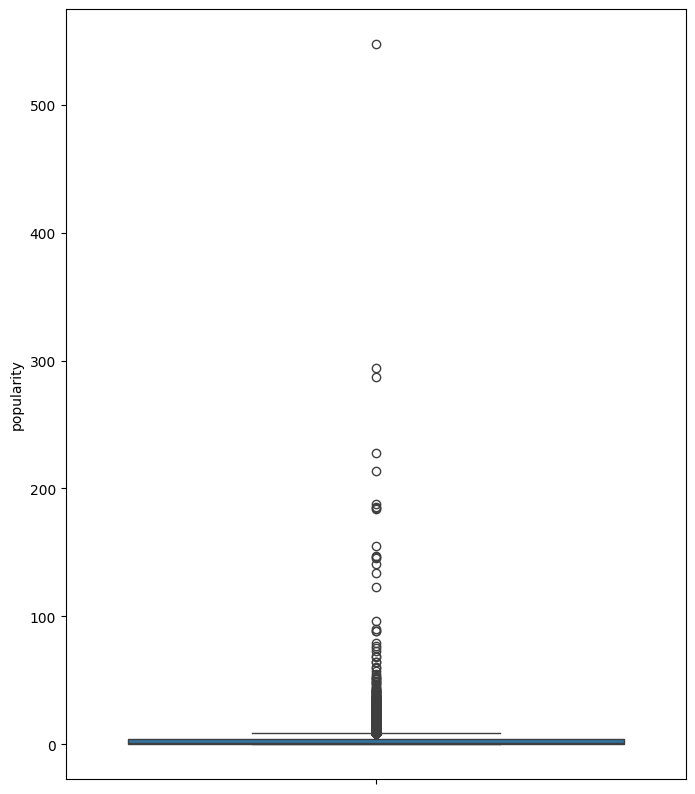

In [51]:
print(2.5*df['popularity'].quantile(0.75)-1.5*df['popularity'].quantile(0.25))
plt.figure(figsize=(8,10))
sns.boxplot(y=df['popularity'])
plt.show()

In [52]:
for i in [0.99,0.999,0.9999,0.99999,0.999999]:
    print('Quantile de la position',i,':',df['popularity'].quantile(i)) 

Quantile de la position 0.99 : 17.00469
Quantile de la position 0.999 : 42.598128500002375
Quantile de la position 0.9999 : 199.68567582485628
Quantile de la position 0.99999 : 432.4310498755442
Quantile de la position 0.999999 : 535.9825731881069


Dans la colonne popularity, il y a des films avec 0 de popularité (ça peut arriver) ,d'autre avec des valeurs de popularité très élevées (c'est le cas des films très célèbres).

On ne peut pas obligatoirement considérer ces valeus comme des NaN ou des outliers, pour réduire l'écart entre ces valeurs, nous allons utiliser la fonction mathématique logarithme népérien vérifiant ln(e)=1, la constante e étant appelée exponentielle de valeur 2,718.

Chaque ligne de cette colonne sera remplacée par ln(1+x) où x est la valeur de la colonne, on prend ln(1+x) pour gérer le cas x=0, car oui, il y a des films avec 0 de popularité. 

In [53]:
df['popularity_log']=np.log1p(df['popularity'])
df['popularity_log']

0        3.133185
1        2.891235
2        2.542617
3        1.580935
4        2.239381
           ...   
45461    0.069574
45462    0.164023
45463    0.643435
45464    0.003497
45465    0.151016
Name: popularity_log, Length: 45451, dtype: float64

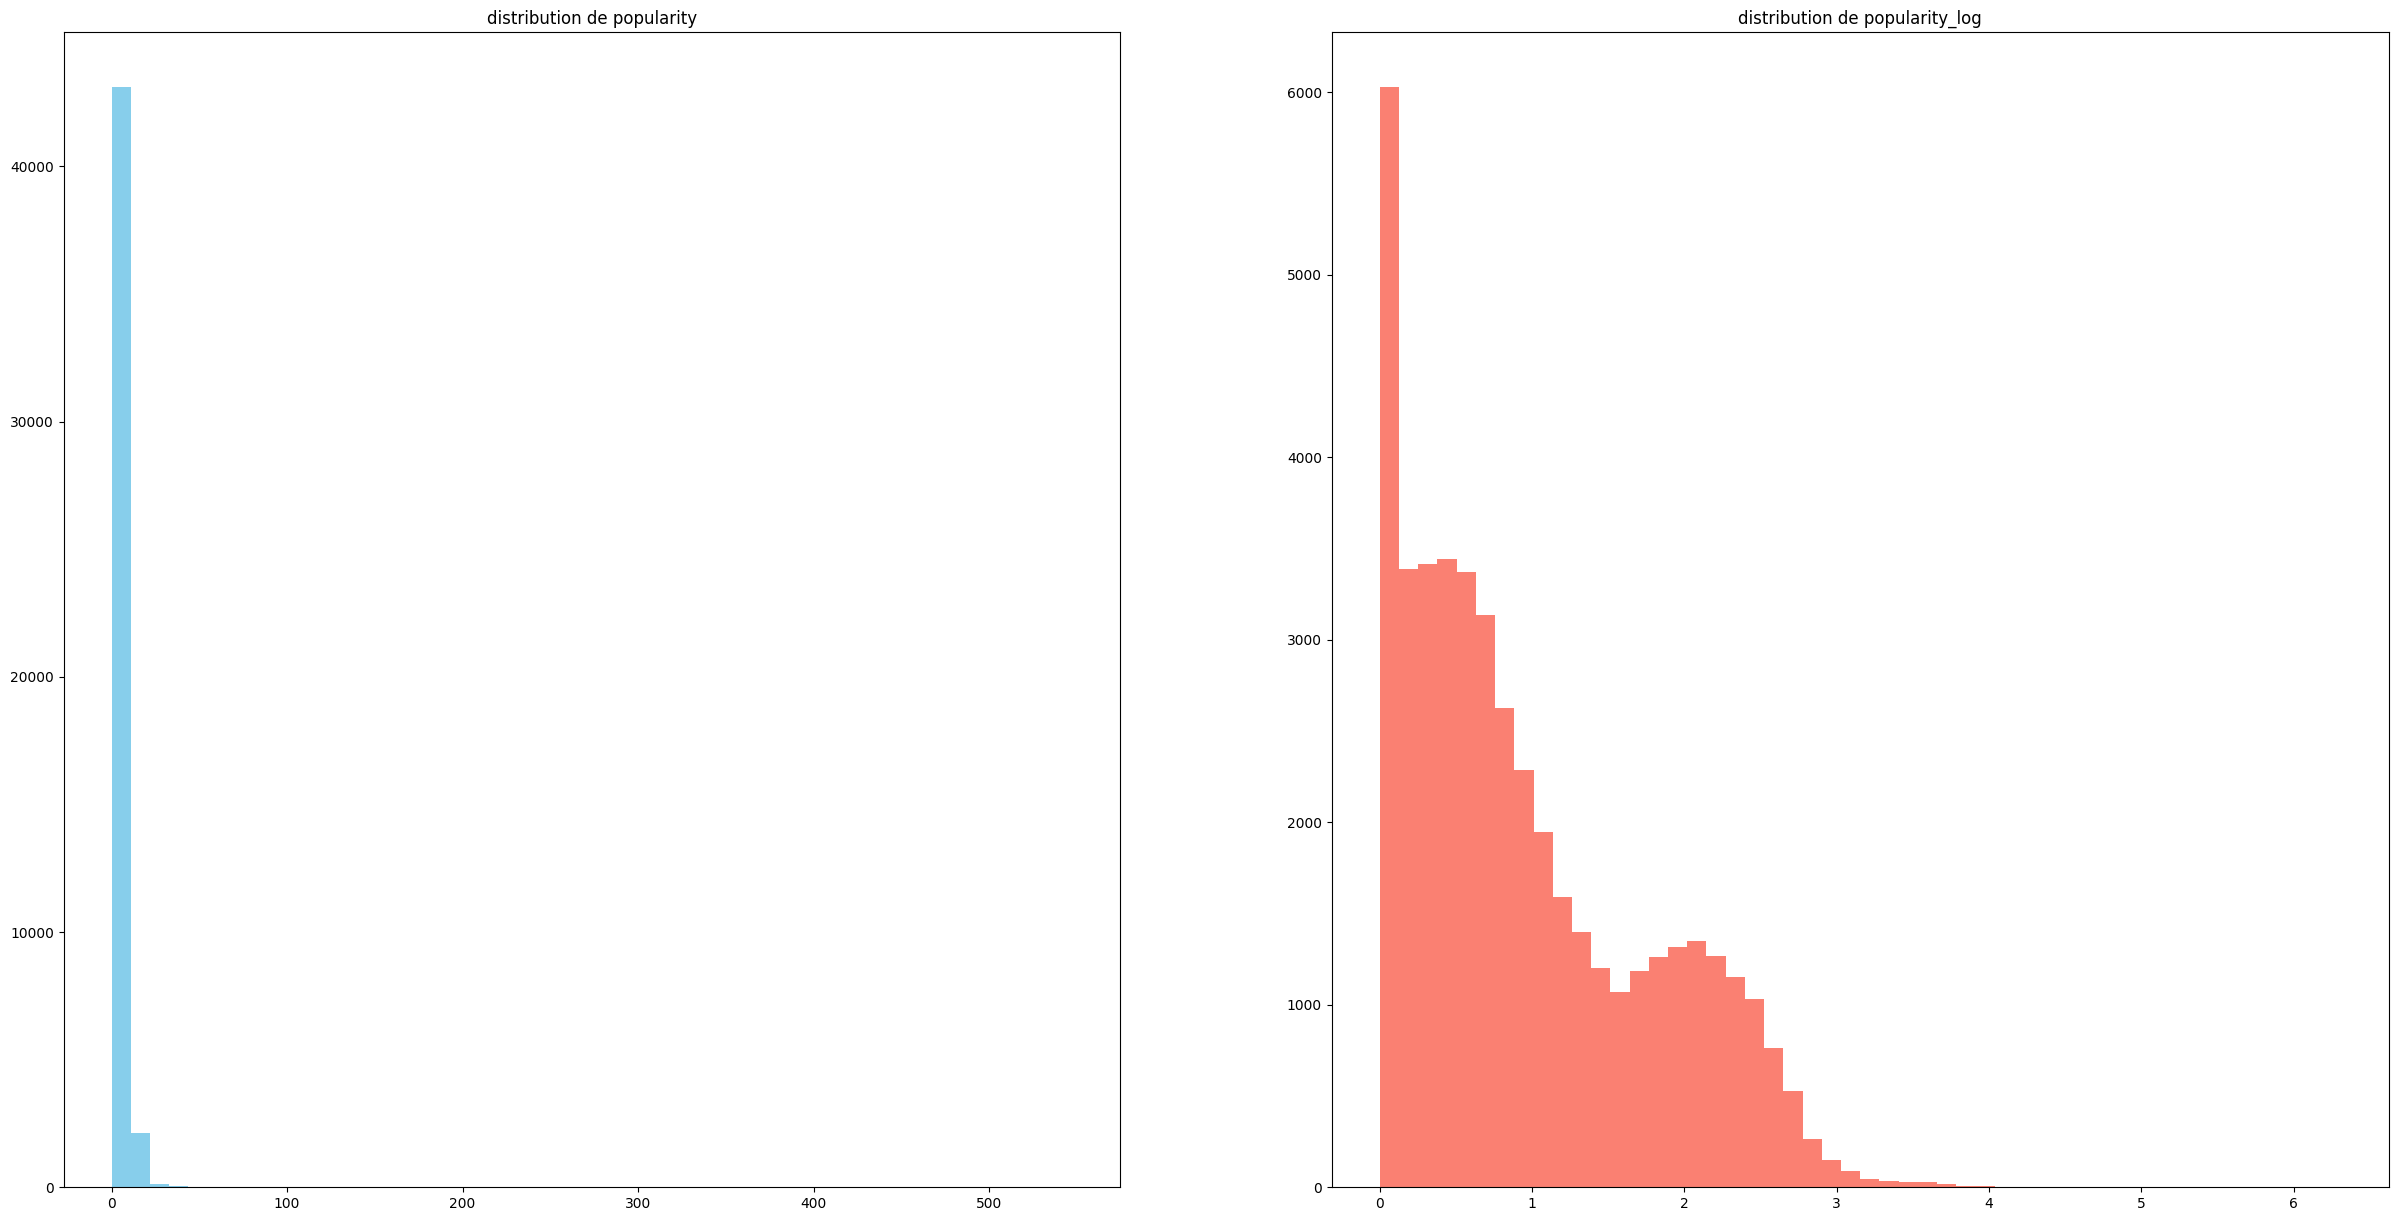

In [54]:
plt.figure(figsize=(30,15))
plt.subplot(1,2,1)
plt.hist(df['popularity'],bins=50,color='skyblue')
plt.title('distribution de popularity')

plt.subplot(1,2,2)
plt.hist(df['popularity_log'],bins=50,color='salmon')
plt.title('distribution de popularity_log')

plt.show()

3.3683166949912153


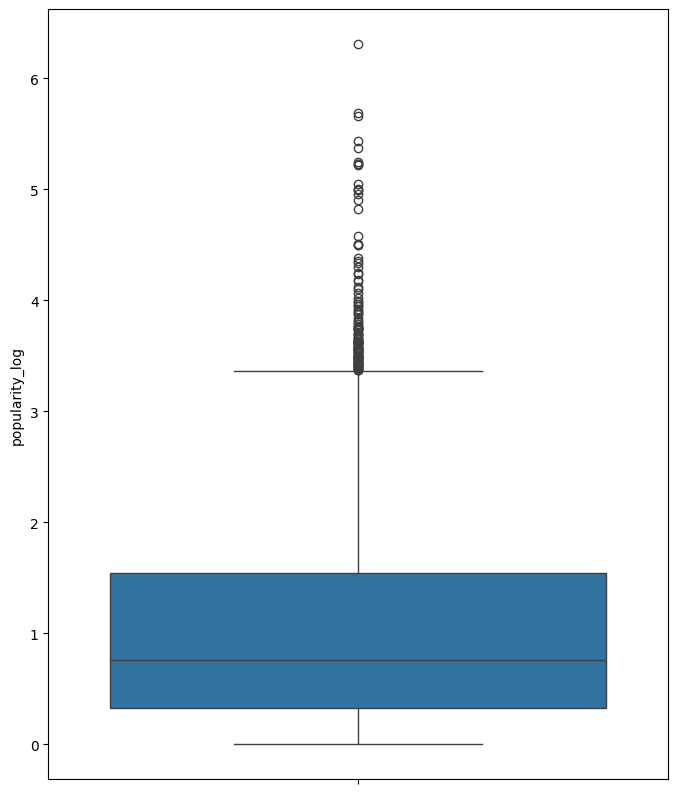

In [55]:
print(2.5*df['popularity_log'].quantile(0.75)-1.5*df['popularity_log'].quantile(0.25))
plt.figure(figsize=(8,10))
sns.boxplot(y=df['popularity_log'])
plt.show()

In [56]:
for i in [0.99,0.999,0.9999,0.99999,0.999999]:
    print('Quantile de la position',i,':',df['popularity_log'].quantile(i)) 

Quantile de la position 0.99 : 2.8906320979705615
Quantile de la position 0.999 : 3.7749708902955135
Quantile de la position 0.9999 : 5.299672242888472
Quantile de la position 0.99999 : 6.025808291496178
Quantile de la position 0.999999 : 6.279030179596007


In [57]:
df['popularity_log'].describe()

count    45451.000000
mean         0.978852
std          0.804050
min          0.000000
25%          0.326382
50%          0.755001
75%          1.543156
max          6.307166
Name: popularity_log, dtype: float64

In [58]:
feature_left_aside=pd.concat([feature_left_aside,df['popularity']],axis=1)
del df['popularity']

In [59]:
del df['poster_path']# aucune importance.

In [60]:
df.loc[:,'production_companies']=df['production_companies'].apply(lambda x:ast.literal_eval(x))
# production_companies également contient des valeurs stringifié, on fait encore appel à literal_eval de ast.

In [61]:
df['production_companies'][2][0]['id']

6194

In [62]:
df.loc[:,'production_countries']=df['production_countries'].apply(lambda x:ast.literal_eval(x))

In [63]:
df['production_countries'][1][0]['name']

'United States of America'

In [64]:
df['production_companies'].isnull().sum()

np.int64(0)

In [65]:
df['production_countries'].isnull().sum()

np.int64(0)

Que ce soit pour production_countries ou pour production_companies, il semble ne pas y avoir de NaN mais attention peut être qu'il y a des dictionnaires vides comme la dernière fois, allons le vérifier avec notre fonction.

In [ ]:
def empty_dico(row):
    if len(row['production_companies'])==0:
        return True
    return False 
print(df.apply(empty_dico,axis=1).sum(),"données manquantes pour production_companies.")


11872 données manquantes pour production_companies.


In [ ]:
def empty_dico(row):
    if len(row['production_countries'])==0:
        return True
    return False 
print(df.apply(empty_dico,axis=1).sum(),"données manquantes pour production_countries.")
print(df[df.apply(empty_dico,axis=1)].describe()['vote_average'],'\n')
print(df.describe()['vote_average'],'\n')
print(df[df.apply(empty_dico,axis=1)].describe()['vote_count'],'\n')
print(df.describe()['vote_count'])


6281 données manquantes pour production_countries.
count    6281.000000
mean        4.776628
std         2.683508
min         0.000000
25%         3.700000
50%         5.500000
75%         6.700000
max        10.000000
Name: vote_average, dtype: float64 

count    45451.000000
mean         5.618543
std          1.924085
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64 

count    6281.000000
mean        5.714217
std        13.558660
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       560.000000
Name: vote_count, dtype: float64 

count    45451.000000
mean       109.917538
std        491.356914
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64


In [68]:
df['production_countries'].value_counts()[0:60]

production_countries
[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                             17848
[]                                                                                                                                                      6281
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                        2238
[{'iso_3166_1': 'FR', 'name': 'France'}]                                                                                                                1654
[{'iso_3166_1': 'JP', 'name': 'Japan'}]                                                                                                                 1356
[{'iso_3166_1': 'IT', 'name': 'Italy'}]                                                                                                                 1029
[{'iso_3166_1': 'CA', 'name': 'Canada

Bon, on va faire la même chose qu'avec la colonne genres,  créer des colonnes pour les éléments de production_countries (on regarde uniquement le pays) attribuer des labels à chaque ligne pour caractériser l'appartenance à ce groupe.

Ici aussi, on rencontre un problème de nombre, mais nous avons déjà réfléchi à une solution pour ce problème.

On va alors appliquer le même principe qu'avec spoken_languages, c'est-à-dire collecter les pays, regarder leurs fréqences, fixer un seuil, et pour finir faire le filtrage.

In [ ]:
collection_country=[]
def collecte_countries(row):
    global collection_country
    list_countries=[]
    for element in row['production_countries']:
        
        collection_country.append(element['name'])
        list_countries.append(element['name'])
# Le tableau collection_country va contenir tous les pays de la colonne production_countries puisqu'il est déclaré en global.
#list_countries contient uniquement les pays pour une ligne de la colonne production_countries.
    return list_countries
df['list_countries']=df.apply(collecte_countries,axis=1)
#print(collection_country)

In [70]:
df['list_countries'].head()
#list_countries contient à présent pour chaque ligne la liste de ses pays de production.

0    [United States of America]
1    [United States of America]
2    [United States of America]
3    [United States of America]
4    [United States of America]
Name: list_countries, dtype: object

In [71]:
freq_countries=pd.Series(collection_country).value_counts()
freq_countries

United States of America    21149
United Kingdom               4094
France                       3940
Germany                      2254
Italy                        2168
                            ...  
Antarctica                      1
Gibraltar                       1
Brunei Darussalam               1
Honduras                        1
Guinea                          1
Name: count, Length: 160, dtype: int64

In [72]:
threshold=432 # valeur limite pour le filtrage.
frequent_countries=freq_countries[freq_countries>threshold].index.tolist()
frequent_countries
#on obtient la liste des pays qui apparaissent au moins 432 fois.

['United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Italy',
 'Canada',
 'Japan',
 'Spain',
 'Russia',
 'India',
 'Hong Kong',
 'Sweden',
 'Australia',
 'South Korea',
 'Belgium']

In [73]:
def filtered_country(list_country):
    filtered_countries=[]
    return [country for country in  list_country if country in frequent_countries]
df['filtered_country']=df['list_countries'].apply(filtered_country)
df['filtered_country']

0        [United States of America]
1        [United States of America]
2        [United States of America]
3        [United States of America]
4        [United States of America]
                    ...            
45461                            []
45462                            []
45463    [United States of America]
45464                      [Russia]
45465              [United Kingdom]
Name: filtered_country, Length: 45451, dtype: object

In [74]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
countries_encoded=pd.DataFrame(mlb.fit_transform(df['filtered_country'] ),index=df.index,columns=mlb.classes_)
countries_encoded.head(10)

,Australia,Belgium,Canada,France,Germany,Hong Kong,India,Italy,Japan,Russia,South Korea,Spain,Sweden,United Kingdom,United States of America
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [75]:
# une colonne other_country pour les pays qui ont eu une fréquence inférieur à celle qui a été fixée.
df['other_country']=df['filtered_country'].apply(lambda x:1 if len(x)==0 else 0)
df['other_country']

0        0
1        0
2        0
3        0
4        0
        ..
45461    1
45462    1
45463    0
45464    0
45465    0
Name: other_country, Length: 45451, dtype: int64

In [76]:
df=pd.concat([df,countries_encoded],axis=1)

In [77]:
del df['list_countries']
del df['filtered_country']

Tout ce qui vient d'être fait avec production_countries va être refait à quelque détails près avec production_companies puisque les deux colonnes sont assez similaires.

In [78]:
df['production_companies'].value_counts()[0:60]

production_companies
[]                                                                                           11872
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                            742
[{'name': 'Warner Bros.', 'id': 6194}]                                                         540
[{'name': 'Paramount Pictures', 'id': 4}]                                                      505
[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]                                439
[{'name': 'Universal Pictures', 'id': 33}]                                                     320
[{'name': 'RKO Radio Pictures', 'id': 6}]                                                      247
[{'name': 'Columbia Pictures Corporation', 'id': 441}]                                         207
[{'name': 'Columbia Pictures', 'id': 5}]                                                       146
[{'name': 'Mosfilm', 'id': 5120}]                                                       

In [79]:
def count_companies(entry):
    if not entry or len(entry) == 0:  
        return 0
    
    return len(entry)  

df['num_companies'] = df['production_companies'].apply(count_companies)

print(df['num_companies'].value_counts().sort_index())


all_companies = [comp['name'] for sublist in df['production_companies'].dropna() 
                 if isinstance(sublist, list) for comp in sublist]

company_freq = pd.Series(all_companies).value_counts()
print("\nTop 20 des compagnies les plus fréquentes :\n", company_freq.head(20))


num_companies
0     11872
1     16572
2      7963
3      4716
4      1947
5       950
6       563
7       314
8       180
9       133
10       67
11       42
12       35
13       19
14       16
15        9
16       21
17        7
18        3
19        5
20        5
21        4
22        3
24        1
25        1
26        3
Name: count, dtype: int64

Top 20 des compagnies les plus fréquentes :
 Warner Bros.                                   1250
Metro-Goldwyn-Mayer (MGM)                      1076
Paramount Pictures                             1003
Twentieth Century Fox Film Corporation          836
Universal Pictures                              830
Columbia Pictures Corporation                   448
Canal+                                          438
Columbia Pictures                               431
RKO Radio Pictures                              290
United Artists                                  279
New Line Cinema                                 277
Walt Disney Pictures          

In [80]:
def extract_company_names(entry):
    if not entry or len(entry) == 0:
        return []
    
    return [company.get('name', '').strip() for company in entry if 'name' in company]

df['prod_company_names'] = df['production_companies'].apply(extract_company_names)


all_companies = [company for sublist in df['prod_company_names'] for company in sublist]
freq = pd.Series(all_companies).value_counts()

#threshold = 270
frequent_companies = freq[freq >= 270].index.tolist()

print("Companies au dessus de threshold:", frequent_companies)


def filter_frequent_companies(company_list):
    return [company for company in company_list if company in frequent_companies]

df['prod_company_filtered'] = df['prod_company_names'].apply(filter_frequent_companies)
                                                             
mlb = MultiLabelBinarizer()
companies_encoded = pd.DataFrame(mlb.fit_transform(df['prod_company_filtered']),
                                 columns=mlb.classes_,
                                 index=df.index)
df['Other_company'] = df['prod_company_filtered'].apply(lambda x: 1 if len(x) == 0 else 0)

df = pd.concat([df, companies_encoded], axis=1)

Companies au dessus de threshold: ['Warner Bros.', 'Metro-Goldwyn-Mayer (MGM)', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Universal Pictures', 'Columbia Pictures Corporation', 'Canal+', 'Columbia Pictures', 'RKO Radio Pictures', 'United Artists', 'New Line Cinema']


In [81]:
feature_left_aside=pd.concat([feature_left_aside,df['production_countries']],axis=1)
del df['production_countries']

feature_left_aside=pd.concat([feature_left_aside,df['production_companies']],axis=1)
del df['production_companies']

del df['prod_company_names']
del df ['prod_company_filtered']


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45451 entries, 0 to 45465
Data columns (total 73 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   budget                                  8889 non-null   float64
 1   release_date                            45368 non-null  object 
 2   revenue                                 45451 non-null  float64
 3   runtime                                 45194 non-null  float64
 4   spoken_languages                        45451 non-null  object 
 5   status                                  45370 non-null  object 
 6   video                                   45451 non-null  object 
 7   vote_average                            45451 non-null  float64
 8   vote_count                              45451 non-null  float64
 9   Animation                               45451 non-null  int64  
 10  Comedy                                  45451 non-null  int64  

In [83]:
df.loc[:,'release_date']=pd.to_datetime(df['release_date'],errors='coerce') # df.loc[:,'release_date']=pd.to_datetime(df['release_date'],errors='coerce')

In [84]:
df['release_date'].info()

<class 'pandas.core.series.Series'>
Index: 45451 entries, 0 to 45465
Series name: release_date
Non-Null Count  Dtype 
--------------  ----- 
45368 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [85]:
df['release_date']

0        1995-10-30 00:00:00
1        1995-12-15 00:00:00
2        1995-12-22 00:00:00
3        1995-12-22 00:00:00
4        1995-02-10 00:00:00
                ...         
45461                    NaT
45462    2011-11-17 00:00:00
45463    2003-08-01 00:00:00
45464    1917-10-21 00:00:00
45465    2017-06-09 00:00:00
Name: release_date, Length: 45451, dtype: object

In [86]:
df[df['release_date'].isnull()]

,budget,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count,Animation,...,Columbia Pictures,Columbia Pictures Corporation,Metro-Goldwyn-Mayer (MGM),New Line Cinema,Paramount Pictures,RKO Radio Pictures,Twentieth Century Fox Film Corporation,United Artists,Universal Pictures,Warner Bros.
711,NaN,NaT,0.0,95.0,[],Released,False,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
734,NaN,NaT,0.0,88.0,[],Released,False,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3460,NaN,NaT,10.0,90.0,[],NaN,False,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3628,NaN,NaT,0.0,105.0,[],Released,False,2.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
5879,NaN,NaT,0.0,87.0,[],Released,False,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45148,NaN,NaT,0.0,76.0,[],Released,False,6.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
45203,NaN,NaT,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,4.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
45338,NaN,NaT,0.0,0.0,[],Released,False,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
45410,NaN,NaT,0.0,NaN,[],Released,False,6.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df.describe()

,budget,revenue,runtime,vote_average,vote_count,Animation,Comedy,Family,Adventure,Fantasy,...,Columbia Pictures,Columbia Pictures Corporation,Metro-Goldwyn-Mayer (MGM),New Line Cinema,Paramount Pictures,RKO Radio Pictures,Twentieth Century Fox Film Corporation,United Artists,Universal Pictures,Warner Bros.
count,8.889000e+03,4.545100e+04,45194.000000,45451.000000,45451.000000,45451.000000,45451.000000,45451.000000,45451.000000,45451.000000,...,45451.000000,45451.000000,45451.000000,45451.000000,45451.000000,45451.000000,45451.000000,45451.000000,45451.000000,45451.000000
mean,2.160662e+07,1.121157e+07,94.133093,5.618543,109.917538,0.042551,0.289961,0.060945,0.076918,0.050890,...,0.009483,0.009857,0.023674,0.006094,0.022068,0.006380,0.018393,0.006138,0.018261,0.027502
std,3.431184e+07,6.433842e+07,38.406223,1.924085,491.356914,0.201845,0.453749,0.239232,0.266464,0.219775,...,0.096918,0.098792,0.152033,0.077830,0.146905,0.079624,0.134371,0.078108,0.133897,0.163543
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+06,0.000000e+00,85.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000e+06,0.000000e+00,95.000000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.500000e+07,0.000000e+00,107.000000,6.800000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
df.loc[: ,'release_date']=df['release_date'].fillna(df['release_date'].quantile(0.5))

C:\Users\feuko\AppData\Local\Temp\ipykernel_23544\1683630043.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[: ,'release_date']=df['release_date'].fillna(df['release_date'].quantile(0.5))


In [89]:
df['release_date'].isnull().sum()

np.int64(0)

In [90]:
df['revenue'].isnull().sum()

np.int64(0)

In [91]:
df[df['revenue']==0]

,budget,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count,Animation,...,Columbia Pictures,Columbia Pictures Corporation,Metro-Goldwyn-Mayer (MGM),New Line Cinema,Paramount Pictures,RKO Radio Pictures,Twentieth Century Fox Film Corporation,United Artists,Universal Pictures,Warner Bros.
2,NaN,1995-12-22 00:00:00,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.5,92.0,0,...,0,0,0,0,0,0,0,0,0,1
6,58000000.0,1995-12-15 00:00:00,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,False,6.2,141.0,0,...,0,0,0,0,1,0,0,0,0,0
7,NaN,1995-12-22 00:00:00,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,False,5.4,45.0,0,...,0,0,0,0,0,0,0,0,0,0
11,NaN,1995-12-22 00:00:00,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,False,5.7,210.0,0,...,1,0,0,0,0,0,0,0,0,0
21,NaN,1995-10-27 00:00:00,0.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,False,6.5,199.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,2001-08-30 00:00:00,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,False,4.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
45462,NaN,2011-11-17 00:00:00,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,False,9.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
45463,NaN,2003-08-01 00:00:00,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,3.8,6.0,0,...,0,0,0,0,0,0,0,0,0,0
45464,NaN,1917-10-21 00:00:00,0.0,87.0,[],Released,False,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


Comme pour le budget, avoir un revenue de 0 semble être impossible même pour un film de qualité médiocre, il est très probable que les valeurs 0 soient en réalité des NaN.

De plus, en regardant le dernier df affiché, on peut voir  des  valeurs de vote_count et des vote_average assez élevées comparer à ce qu'on a vue précédemment. C'est pratiquement impossible d'avoir un revenue de 0 avec tout ça.

In [92]:
df[df['revenue']==0].describe()[['budget','vote_average','vote_count','popularity_log']]

,budget,vote_average,vote_count,popularity_log
count,3.508000e+03,38043.000000,38043.000000,38043.000000
mean,7.052503e+06,5.501900,22.417843,0.783655
std,1.261650e+07,2.033187,57.463504,0.655696
min,1.000000e+00,0.000000,0.000000,0.000000
25%,5.000000e+05,5.000000,3.000000,0.263574
50%,2.500000e+06,6.000000,7.000000,0.627064
75%,8.000000e+06,6.800000,19.000000,1.139056
max,1.500000e+08,10.000000,1730.000000,4.379614


Le derniere tableau confirme ce qui a été dit précédemment.
Pour traiter le revenue, on va commencer par regarder la colonne qui a le plus de corrélation avec revenue, une fois cette dernière trouvée, on va fabriquer des bins avec la colonne trouvée pour ensuite attribuer à chaque ligne du df un intervalle de valeurs en fonction de la valeur qui sera dans la colonne qui aura le plus corrélé.

Par exemple, on pourrait obtenir l'intervalle [10,20] pour la première ligne, et bien cela voudrait dire que la valeur de cette ligne pour la colonne qui aura la plus grande corrélation serait entre 10 et 20.

Par suite, on va grouper tous ceux qui auront le même intervalle pour en faire des ensembles de données. Pour chaque ensemble, on s'interessera uniquement à la colonne revenue et on calculera la médianne des éléments de la colonne revenue, les valeurs NaN de tous les groupes seront remplacées par leurs médiannes respectives. 

In [ ]:
corr_matrix = df[['revenue', 'budget', 'vote_average', 'vote_count']].corr()
print(corr_matrix['revenue'])  # on va essayer de faire un remplacement suivant la variable qui correlle le plus avec revenue.

revenue         1.000000
budget          0.740050
vote_average    0.083852
vote_count      0.812021
Name: revenue, dtype: float64


In [94]:
df['vote_count'].isnull().sum()

np.int64(0)

In [95]:
df.loc[:,'revenue'] = df['revenue'].replace(0, np.nan) # on remplace les 0 par des NaN.

In [96]:
df['vote_count_bin']=pd.qcut(df['vote_count'],q=10,duplicates='drop') # création des bins avec la colonne vote_count qui a une corr de 0.81
df['vote_count_bin']

0        (160.0, 14075.0]
1        (160.0, 14075.0]
2           (50.0, 160.0]
3            (25.0, 50.0]
4        (160.0, 14075.0]
               ...       
45461       (-0.001, 1.0]
45462          (2.0, 4.0]
45463          (4.0, 6.0]
45464       (-0.001, 1.0]
45465       (-0.001, 1.0]
Name: vote_count_bin, Length: 45451, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 4.0] < (4.0, 6.0] ... (15.0, 25.0] < (25.0, 50.0] < (50.0, 160.0] < (160.0, 14075.0]]

In [97]:
median_revenue_by_group=df.groupby('vote_count_bin',observed=True)['revenue'].median()
median_revenue_by_group # récupération des médiannes.

vote_count_bin
(-0.001, 1.0]          43719.0
(1.0, 2.0]            269127.0
(2.0, 4.0]            453463.5
(4.0, 6.0]            660537.0
(6.0, 10.0]          1553826.0
(10.0, 15.0]         2154540.0
(15.0, 25.0]         2642983.0
(25.0, 50.0]         4730610.0
(50.0, 160.0]       10120095.5
(160.0, 14075.0]    60780981.0
Name: revenue, dtype: float64

Cela signifie que pour les lignes qui ont un vote_count dans l'intervalle (15,25] par exemple, la médianne de leurs revenues est de 2642983.

In [98]:
df['revenue'].isnull().sum()

np.int64(38043)

In [ ]:
global_revenue_median= df['revenue'].median()
def impute_revenue(row):
    group_median=median_revenue_by_group[row['vote_count_bin']]
# Il se peut peut être que dans un groupe, on ai trouver que des NaN (même si c'est pas le cas ici) dans ce cas, group_median telle que définie sera nulle.
# Pour palier au problème, il suffirait de remplacer par la médianne globale, si elle est nulle ,alors supprimer cette colonne 😅😁
    if pd.isnull(group_median):
        return global_revenue_median
    if pd.isnull(row['revenue']):
        return group_median
    return row['revenue']

In [100]:
df.loc[:,'revenue']=df.apply(impute_revenue, axis=1) # le axis=1 pour spécifier que l'opération seffectue sur les lignes.

In [101]:
df['revenue'].isnull().sum()

np.int64(0)

In [102]:
df.describe()['revenue']

count    4.545100e+04
mean     1.406336e+07
std      6.438083e+07
min      1.000000e+00
25%      4.534635e+05
50%      1.553826e+06
75%      4.730610e+06
max      2.787965e+09
Name: revenue, dtype: float64

ET voilà! Plus aucun NaN, les nouvelles valeurs de revenue sont assez diversifiées, ce qui est typique pour ce genre de colonne.

Puisque cette approche à plutôt bien fonctionner, on va refaire la même chose mais avec la colonne budget qui a un problème similaire.

In [103]:
corr_matrix = df[['revenue', 'budget', 'vote_average', 'vote_count']].corr()
print(corr_matrix['budget'])  # on va refaire la même opération avec budget

revenue         0.740145
budget          1.000000
vote_average    0.094938
vote_count      0.619899
Name: budget, dtype: float64


In [104]:
df['revenue_bin']=pd.qcut(df['revenue'],q=10,duplicates='drop')
df['revenue_bin']

0        (16756372.0, 2787965087.0]
1        (16756372.0, 2787965087.0]
2           (4730610.0, 16756372.0]
3        (16756372.0, 2787965087.0]
4        (16756372.0, 2787965087.0]
                    ...            
45461              (0.999, 43719.0]
45462          (269127.0, 453463.5]
45463          (453463.5, 660537.0]
45464              (0.999, 43719.0]
45465              (0.999, 43719.0]
Name: revenue_bin, Length: 45451, dtype: category
Categories (10, interval[float64, right]): [(0.999, 43719.0] < (43719.0, 269127.0] < (269127.0, 453463.5] < (453463.5, 660537.0] ... (2154540.0, 2642983.0] < (2642983.0, 4730610.0] < (4730610.0, 16756372.0] < (16756372.0, 2787965087.0]]

In [105]:
df['budget'].isnull().sum()

np.int64(36562)

In [106]:
budget_median_by_group=df.groupby('revenue_bin',observed=True)['budget'].median()
budget_median_by_group

revenue_bin
(0.999, 43719.0]                500000.0
(43719.0, 269127.0]            1600000.0
(269127.0, 453463.5]           1105736.0
(453463.5, 660537.0]           1250000.0
(660537.0, 1553826.0]          1554311.0
(1553826.0, 2154540.0]         2500000.0
(2154540.0, 2642983.0]         3000000.0
(2642983.0, 4730610.0]         4000000.0
(4730610.0, 16756372.0]        7500000.0
(16756372.0, 2787965087.0]    28000000.0
Name: budget, dtype: float64

In [107]:
global_budget_median=df['budget'].median()

def impute_budget(row):
    group_median=budget_median_by_group[row['revenue_bin']]
    if pd.isnull(group_median):
        return global_budget_median
    if pd.isnull(row['budget']):
        return group_median
    return row['budget']

In [108]:
df.loc[:,'budget']=df.apply(impute_budget,axis=1)

In [109]:
df['budget'].isnull().sum()

np.int64(0)

In [110]:
df['budget'].describe()

count    4.545100e+04
mean     6.505438e+06
std      1.736387e+07
min      1.000000e+00
25%      1.105736e+06
50%      1.600000e+06
75%      4.000000e+06
max      3.800000e+08
Name: budget, dtype: float64

Les NaN ont été retirées et les valeurs pour cette colonne sont à différentes échelles, typique pour ce genre de colonne.

Jetons un coup d'oeil à la représentation graphique de ces deux colonnes.

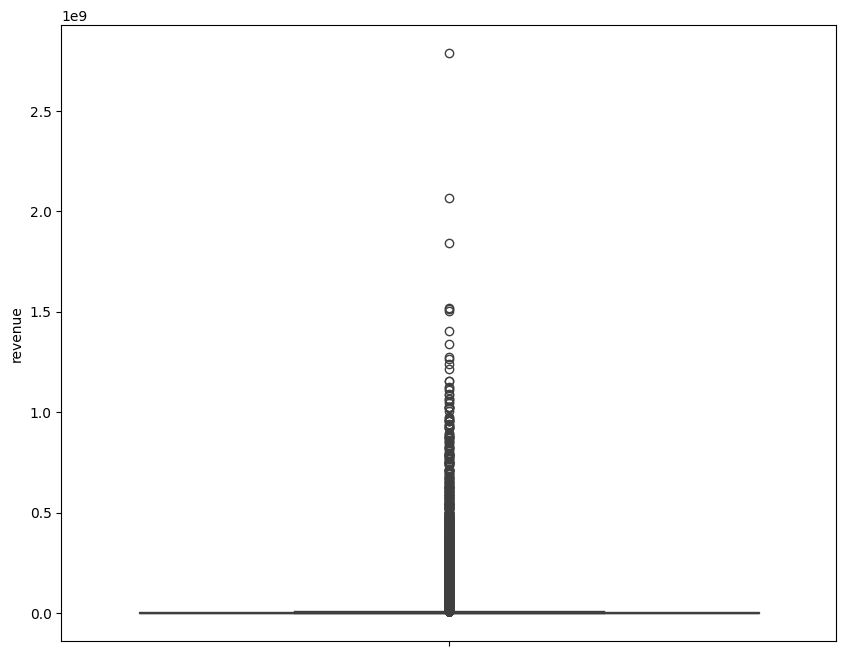

In [111]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['revenue'])
plt.show()

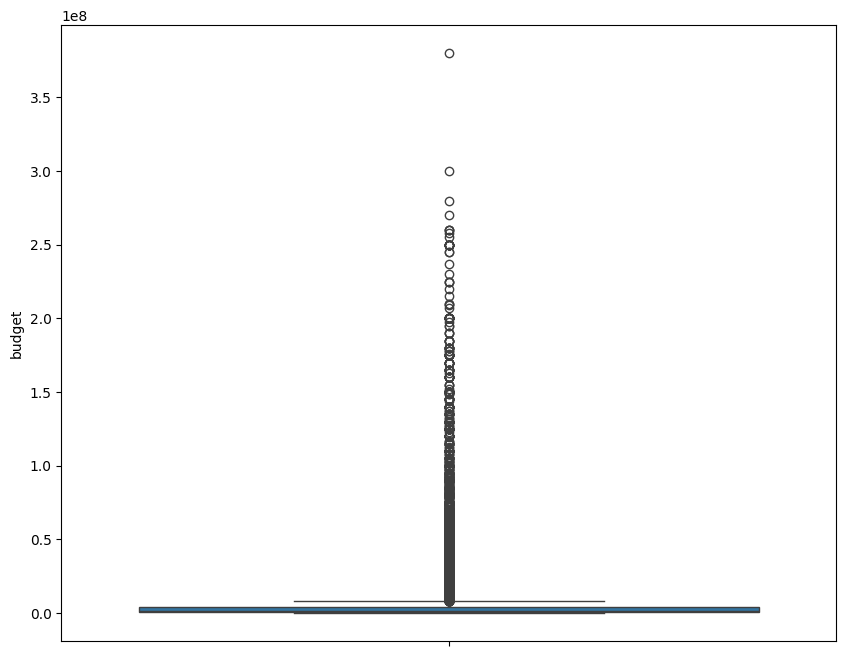

In [112]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['budget'])
plt.show()

Bon il est vrai que ce genre de valeur est normal pour ce type de colonne mais tout de même un écart si grand pourrait causer problème avec le modèle qu'on fera.

Faire appel à une méthode comme IQR nous ferait perdre trop d'info, on va à la place réutiliser la fonction ln(1+x).

In [113]:
df['revenue_log']=np.log1p(df['revenue'])
df['budget_log']=np.log1p(df['budget'])

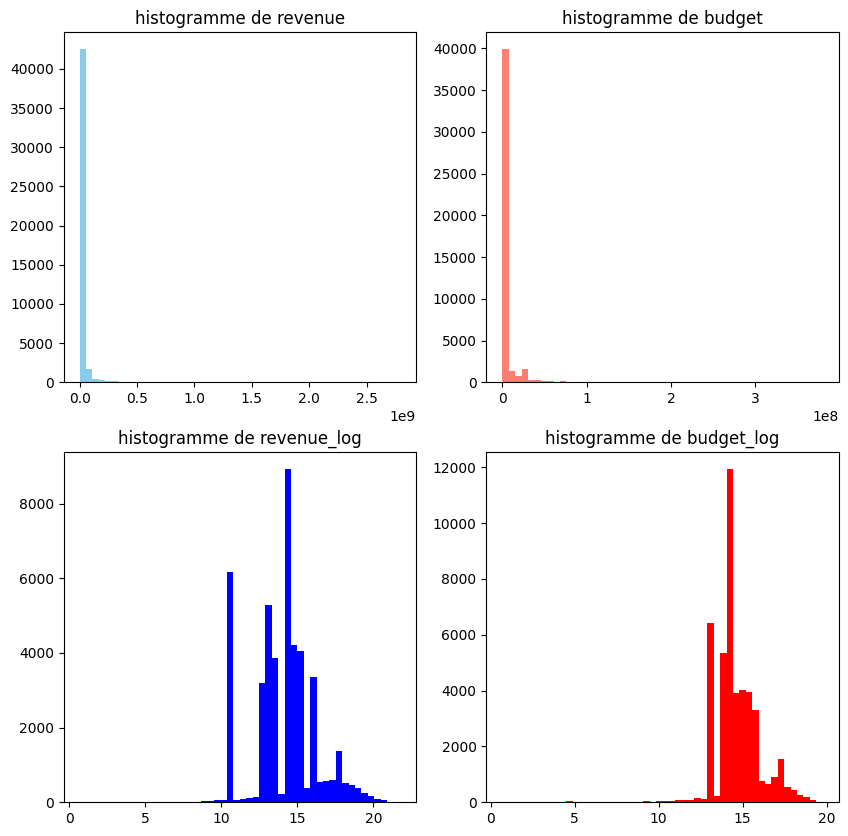

In [114]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.hist(df['revenue'],bins=50,color='skyblue')
plt.title('histogramme de revenue')

plt.subplot(2,2,2)
plt.hist(df['budget'],bins=50,color='salmon')
plt.title('histogramme de budget')

plt.subplot(2,2,3)
plt.hist(df['revenue_log'],bins=50,color='blue')
plt.title('histogramme de revenue_log')

plt.subplot(2,2,4)
plt.hist(df['budget_log'],bins=50,color='red')
plt.title('histogramme de budget_log')

plt.show()

count    45451.000000
mean        14.080063
std          2.181449
min          0.693147
25%         13.024672
50%         14.256231
75%         15.369565
max         21.748578
Name: revenue_log, dtype: float64

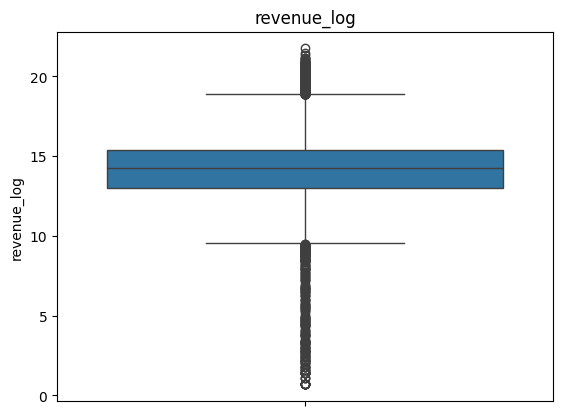

In [115]:
plt.figure()
sns.boxplot(y=df['revenue_log'])
plt.title('revenue_log')
df['revenue_log'].describe()

count    45451.000000
mean        14.572312
std          1.505661
min          0.693147
25%         13.916023
50%         14.285515
75%         15.201805
max         19.755682
Name: budget_log, dtype: float64

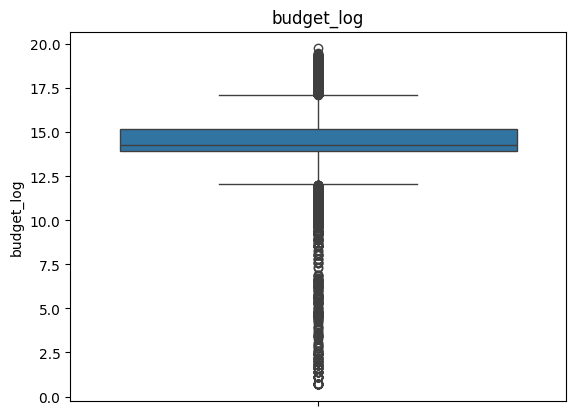

In [116]:
plt.figure()
sns.boxplot(y=df['budget_log'])
plt.title('budget_log')
df['budget_log'].describe()

In [117]:
feature_left_aside=pd.concat([feature_left_aside,df['revenue_bin']],axis=1)
del df['revenue_bin']

In [118]:
feature_left_aside=pd.concat([feature_left_aside,df['budget']],axis=1)
del df['budget']

C'est beaucoup mieux à présent.

In [119]:
df['runtime'].isnull().sum()

np.int64(257)

In [120]:
df.describe()['runtime']

count    45194.000000
mean        94.133093
std         38.406223
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

Un runtime de 0, pas très réaliste ça sauf peut être si le film n'a pas été tourné?  Ce n'est pas très important, on va juste gérer les NaN et laisser ces runtime de 0, normalement elle ne sera pas trop utile. 

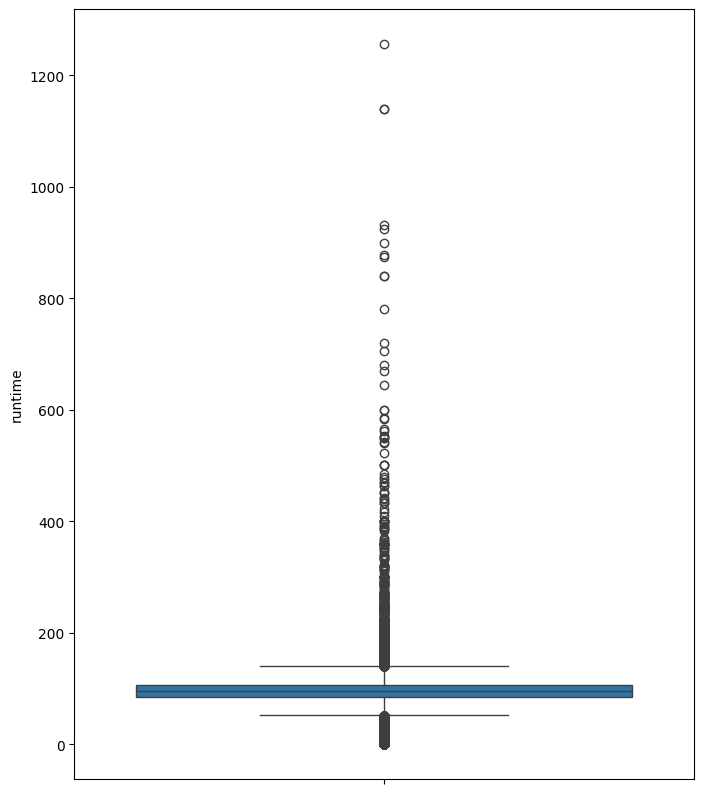

In [121]:
plt.figure(figsize=(8,10))
sns.boxplot(y=df['runtime'])
plt.show()

In [ ]:
upper_runtime= 2.5*(df['runtime'].quantile(0.75))-1.5*(df['runtime'].quantile(0.25))
median_upper_runtime=df[df['runtime']<=upper_runtime]['runtime'].median()
median_upper_runtime # on retire les outliers du df, on évalue une medianne des élements restants et c'est elle qui va servir pour le remplacement.

np.float64(94.0)

In [123]:
df.loc[:,'runtime']=df['runtime'].apply(lambda x: median_upper_runtime if pd.isnull(x) else x)

In [124]:
df['runtime'].isnull().sum()

np.int64(0)

count    45451.000000
mean        94.132340
std         38.297485
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

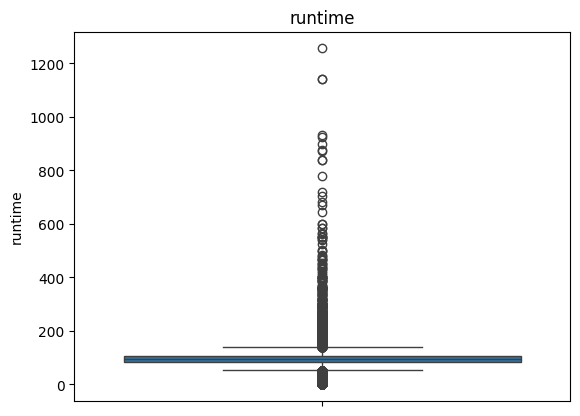

In [125]:
plt.figure()
sns.boxplot(y=df['runtime'])
plt.title('runtime')
df['runtime'].describe()

In [126]:
df['runtime_log']=np.log1p(df['runtime']) # on se permet de mettre runtime à échelle logarithmique.

count    45451.000000
mean         4.364206
std          0.939851
min          0.000000
25%          4.454347
50%          4.564348
75%          4.682131
max          7.136483
Name: runtime_log, dtype: float64

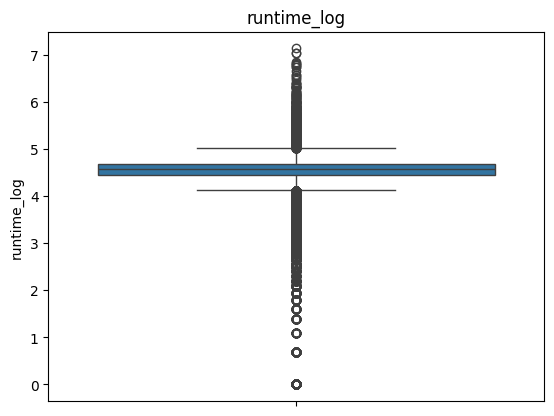

In [127]:
plt.figure()
sns.boxplot(y=df['runtime_log'])
plt.title('runtime_log')
df['runtime_log'].describe()

In [128]:
feature_left_aside=pd.concat([feature_left_aside,df['runtime']],axis=1)
del df['runtime']

In [129]:
df['spoken_languages'].isnull().sum()

np.int64(0)

In [130]:
df.loc[:,'spoken_languages']=df['spoken_languages'].apply(lambda x: ast.literal_eval(x))
#comme avec la colonne genres, cette colonne contient des dictionnaire stringifié.

In [131]:
df['spoken_languages'].isnull().sum()

np.int64(0)

In [ ]:
def empty_dico(row):
    if len(row['spoken_languages'])==0:
        return True
    return False 
print(df.apply(empty_dico,axis=1).sum(),"valeurs vide pour spoken_languages")

3829 valeurs vide pour spoken_languages


In [133]:
df['spoken_languages'].head()

0             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2             [{'iso_639_1': 'en', 'name': 'English'}]
3             [{'iso_639_1': 'en', 'name': 'English'}]
4             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

On va toujours faire le même processus: collection des plus fréquents, filtrage, création des colonnes pour attribuer des labels.

In [134]:
collection_spoken_lang=[]
def collecte_spoken_lang(row):
    global collection_spoken_lang
    list_spoken_lang=[]
    for element in row['spoken_languages']:
        
        collection_spoken_lang.append(element['name'])
        list_spoken_lang.append(element['name'])
    return list_spoken_lang
df['list_spoken_lang']=df.apply(collecte_spoken_lang,axis=1)
#print(collection_spoken_lang)
df['list_spoken_lang'].head(15)

0                       [English]
1             [English, Français]
2                       [English]
3                       [English]
4                       [English]
5              [English, Español]
6             [Français, English]
7              [English, Deutsch]
8                       [English]
9     [English, Pусский, Español]
10                      [English]
11             [English, Deutsch]
12                      [English]
13                      [English]
14               [English, Latin]
Name: list_spoken_lang, dtype: object

In [135]:
freq_spoken_lang=pd.Series(collection_spoken_lang).value_counts()
freq_spoken_lang.head(20)

English        28739
Français        4196
Deutsch         2625
Español         2412
Italiano        2366
日本語             1758
Pусский         1563
普通话              790
हिन्दी           707
Português        591
svenska          560
한국어/조선말          542
Polski           524
                 498
广州话 / 廣州話        472
suomi            371
Magyar           360
العربية          341
Nederlands       340
No Language      319
Name: count, dtype: int64

In [136]:
#threshold=500
frequent_spoken_lang=freq_spoken_lang[freq_spoken_lang>500].index.tolist()
frequent_spoken_lang

['English',
 'Français',
 'Deutsch',
 'Español',
 'Italiano',
 '日本語',
 'Pусский',
 '普通话',
 'हिन्दी',
 'Português',
 'svenska',
 '한국어/조선말',
 'Polski']

In [137]:
def filtered_spoken_lang(list_spoken_lang):
    filtered_spoken_lang=[]
    return [spoken_lang for spoken_lang in  list_spoken_lang if spoken_lang in frequent_spoken_lang]
df['filtered_spoken_lang']=df['list_spoken_lang'].apply(filtered_spoken_lang)
df['filtered_spoken_lang']

0                  [English]
1        [English, Français]
2                  [English]
3                  [English]
4                  [English]
                ...         
45461                     []
45462                     []
45463              [English]
45464                     []
45465              [English]
Name: filtered_spoken_lang, Length: 45451, dtype: object

In [138]:
mlb=MultiLabelBinarizer()
spoken_lang_encoded=pd.DataFrame(mlb.fit_transform(df['filtered_spoken_lang'] ),index=df.index,columns=mlb.classes_)
spoken_lang_encoded.head(10)

,Deutsch,English,Español,Français,Italiano,Polski,Português,Pусский,svenska,हिन्दी,日本語,普通话,한국어/조선말
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,0,0,0
6,0,1,0,1,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,1,0,0,0,0,0


In [139]:
df['other_spoken_lang']=df['filtered_spoken_lang'].apply(lambda x:1 if len(x)==0 else 0)
df['other_spoken_lang']

0        0
1        0
2        0
3        0
4        0
        ..
45461    1
45462    1
45463    0
45464    1
45465    0
Name: other_spoken_lang, Length: 45451, dtype: int64

In [140]:
df=pd.concat([spoken_lang_encoded,df],axis=1)

In [141]:
feature_left_aside=pd.concat([feature_left_aside,df['filtered_spoken_lang']],axis=1)
del df['filtered_spoken_lang']

In [142]:
feature_left_aside=pd.concat([feature_left_aside,df['spoken_languages']],axis=1)
del df['spoken_languages']

In [143]:
feature_left_aside=pd.concat([feature_left_aside,df['list_spoken_lang']],axis=1)
del df['list_spoken_lang']

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45451 entries, 0 to 45465
Data columns (total 88 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Deutsch                                 45451 non-null  int64   
 1   English                                 45451 non-null  int64   
 2   Español                                 45451 non-null  int64   
 3   Français                                45451 non-null  int64   
 4   Italiano                                45451 non-null  int64   
 5   Polski                                  45451 non-null  int64   
 6   Português                               45451 non-null  int64   
 7   Pусский                                 45451 non-null  int64   
 8   svenska                                 45451 non-null  int64   
 9   हिन्दी                                  45451 non-null  int64   
 10  日本語                                     45451 non-n

In [145]:
df['status'].isnull().sum()

np.int64(81)

In [146]:
df['status'].value_counts()

status
Released           45006
Rumored              230
Post Production       98
In Production         19
Planned               15
Canceled               2
Name: count, dtype: int64

In [147]:
df[df['status'].isnull()]['vote_count'].describe()

count    81.000000
mean      3.382716
std       9.959377
min       0.000000
25%       0.000000
50%       2.000000
75%       3.000000
max      88.000000
Name: vote_count, dtype: float64

In [ ]:
df[df['status'].isnull()]['vote_average'].describe() # Plusieur film n'ont obtenu aucun vote, remplacer status par le mode pourrait être trompeur.

count    81.000000
mean      4.025926
std       3.137267
min       0.000000
25%       0.000000
50%       5.000000
75%       6.500000
max      10.000000
Name: vote_average, dtype: float64

Pour cette colonne status, on ne va pas remplacer par le mode, ça pourrait être trompeur.

Pour notre approche, on part du principe qu'il existe une corrélation entre le status et le revenue, plus le revenue est grand, plus le film à de chance d'avoir le label released pour la colonne status.

In [149]:
df['revenue'].max()

np.float64(2787965087.0)

In [150]:
df[df['status'].isnull()]['revenue'].describe()

count    8.100000e+01
mean     4.291990e+05
std      1.174661e+06
min      1.000000e+01
25%      4.371900e+04
50%      9.700000e+04
75%      4.534635e+05
max      1.012010e+07
Name: revenue, dtype: float64

In [151]:
def impute_status(row):
    if pd.notnull(row['status']):
        return row['status']

    if row['revenue']>100000:
        return 'Released'
    if row['revenue']<10000:
        return 'Post Production'
    return 'Rumored'

df.loc[:,'status']=df.apply(impute_status,axis=1)

In [152]:
df['status'].isnull().sum()

np.int64(0)

In [153]:
df['status'].value_counts()

status
Released           45046
Rumored              270
Post Production       99
In Production         19
Planned               15
Canceled               2
Name: count, dtype: int64

In [154]:
feature_left_aside=pd.concat([feature_left_aside,df['status'],df['vote_count_bin'],df['revenue']],axis=1)
del df['status']
del df['vote_count_bin']
del df['revenue']

In [155]:
df['video'].value_counts()

video
False    45358
True        93
Name: count, dtype: int64

In [156]:
del df['video']

In [157]:
df['vote_average'].isnull().sum()

np.int64(0)

In [158]:
df['vote_count'].isnull().sum()

np.int64(0)

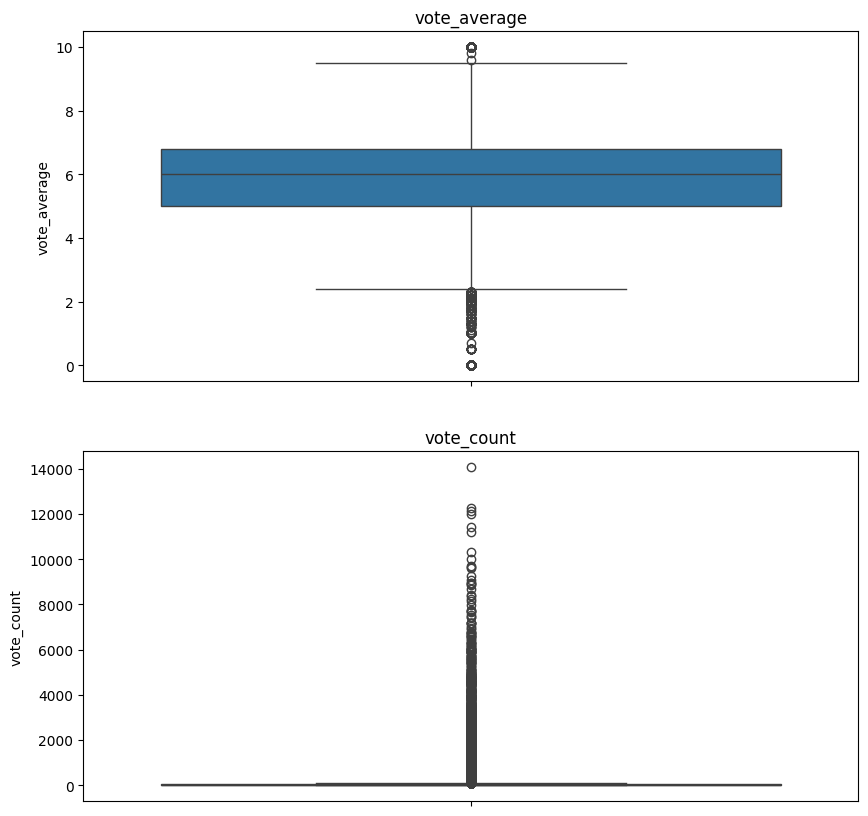

In [159]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.boxplot(df['vote_average'])
plt.title('vote_average')
plt.subplot(2,1,2)
sns.boxplot(df['vote_count'])
plt.title('vote_count')
plt.show()

In [160]:
df['vote_average'].describe() 

count    45451.000000
mean         5.618543
std          1.924085
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [161]:
df['vote_count'].describe()

count    45451.000000
mean       109.917538
std        491.356914
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [ ]:
# La colonne vote_average semble correcte, par contre vote_count doit être ajusté.
df['vote_count_log']=np.log1p(df['vote_count'])
df['vote_count_log'].head()

0    8.597113
1    7.789040
2    4.532599
3    3.555348
4    5.159055
Name: vote_count_log, dtype: float64

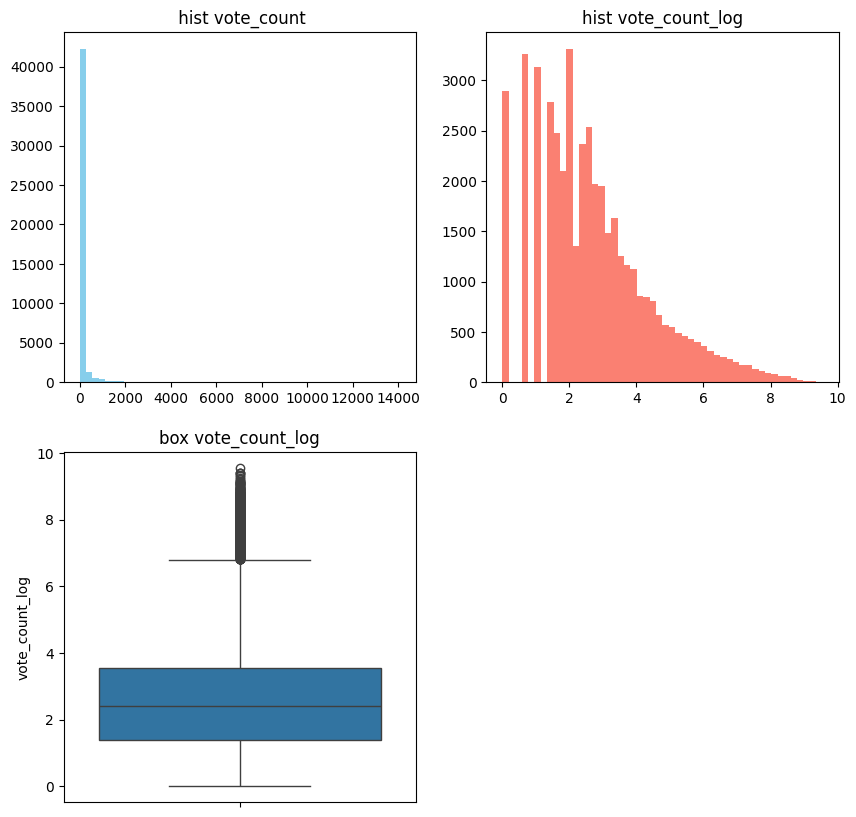

In [163]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(df['vote_count'],bins=50,color='skyblue')
plt.title(' hist vote_count')
plt.subplot(2,2,2)
plt.hist(df['vote_count_log'],bins=50,color='salmon')
plt.title('hist vote_count_log')
plt.subplot(2,2,3)
sns.boxplot(df['vote_count_log'])
plt.title('box vote_count_log')
plt.show()

In [164]:
df['vote_count_log'].describe()

count    45451.000000
mean         2.653223
std          1.726258
min          0.000000
25%          1.386294
50%          2.397895
75%          3.555348
max          9.552226
Name: vote_count_log, dtype: float64

In [165]:
feature_left_aside=pd.concat([feature_left_aside,df['vote_count']],axis=1)
del df['vote_count']

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45451 entries, 0 to 45465
Data columns (total 84 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Deutsch                                 45451 non-null  int64  
 1   English                                 45451 non-null  int64  
 2   Español                                 45451 non-null  int64  
 3   Français                                45451 non-null  int64  
 4   Italiano                                45451 non-null  int64  
 5   Polski                                  45451 non-null  int64  
 6   Português                               45451 non-null  int64  
 7   Pусский                                 45451 non-null  int64  
 8   svenska                                 45451 non-null  int64  
 9   हिन्दी                                  45451 non-null  int64  
 10  日本語                                     45451 non-null  int64  

In [167]:
colonne=df.columns.tolist()
for i in colonne:
    print(i,end=' ')

Deutsch English Español Français Italiano Polski Português Pусский svenska हिन्दी 日本語 普通话 한국어/조선말 release_date vote_average Animation Comedy Family Adventure Fantasy Romance Drama Action Crime Thriller Horror History Science Fiction Mystery War Foreign Music Documentary Western TV Movie en fr zh it de cn es ru sv ja ko pt hi other_language popularity_log other_country Australia Belgium Canada France Germany Hong Kong India Italy Japan Russia South Korea Spain Sweden United Kingdom United States of America num_companies Other_company Canal+ Columbia Pictures Columbia Pictures Corporation Metro-Goldwyn-Mayer (MGM) New Line Cinema Paramount Pictures RKO Radio Pictures Twentieth Century Fox Film Corporation United Artists Universal Pictures Warner Bros. revenue_log budget_log runtime_log other_spoken_lang vote_count_log 

In [168]:
for i in df.columns:
    print(i,df.isnull().sum()[i])

Deutsch 0
English 0
Español 0
Français 0
Italiano 0
Polski 0
Português 0
Pусский 0
svenska 0
हिन्दी 0
日本語 0
普通话 0
한국어/조선말 0
release_date 0
vote_average 0
Animation 0
Comedy 0
Family 0
Adventure 0
Fantasy 0
Romance 0
Drama 0
Action 0
Crime 0
Thriller 0
Horror 0
History 0
Science Fiction 0
Mystery 0
War 0
Foreign 0
Music 0
Documentary 0
Western 0
TV Movie 0
en 0
fr 0
zh 0
it 0
de 0
cn 0
es 0
ru 0
sv 0
ja 0
ko 0
pt 0
hi 0
other_language 0
popularity_log 0
other_country 0
Australia 0
Belgium 0
Canada 0
France 0
Germany 0
Hong Kong 0
India 0
Italy 0
Japan 0
Russia 0
South Korea 0
Spain 0
Sweden 0
United Kingdom 0
United States of America 0
num_companies 0
Other_company 0
Canal+ 0
Columbia Pictures 0
Columbia Pictures Corporation 0
Metro-Goldwyn-Mayer (MGM) 0
New Line Cinema 0
Paramount Pictures 0
RKO Radio Pictures 0
Twentieth Century Fox Film Corporation 0
United Artists 0
Universal Pictures 0
Warner Bros. 0
revenue_log 0
budget_log 0
runtime_log 0
other_spoken_lang 0
vote_count_log 0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45451 entries, 0 to 45465
Data columns (total 84 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Deutsch                                 45451 non-null  int64  
 1   English                                 45451 non-null  int64  
 2   Español                                 45451 non-null  int64  
 3   Français                                45451 non-null  int64  
 4   Italiano                                45451 non-null  int64  
 5   Polski                                  45451 non-null  int64  
 6   Português                               45451 non-null  int64  
 7   Pусский                                 45451 non-null  int64  
 8   svenska                                 45451 non-null  int64  
 9   हिन्दी                                  45451 non-null  int64  
 10  日本語                                     45451 non-null  int64  

In [170]:
# les index vont de 0 à 45465 alors qu'il n y a que 45451 lignes
feature_left_aside=feature_left_aside.reset_index(drop=True)
df=df.reset_index(drop=True)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 84 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Deutsch                                 45451 non-null  int64  
 1   English                                 45451 non-null  int64  
 2   Español                                 45451 non-null  int64  
 3   Français                                45451 non-null  int64  
 4   Italiano                                45451 non-null  int64  
 5   Polski                                  45451 non-null  int64  
 6   Português                               45451 non-null  int64  
 7   Pусский                                 45451 non-null  int64  
 8   svenska                                 45451 non-null  int64  
 9   हिन्दी                                  45451 non-null  int64  
 10  日本語                                     45451 non-null  in

In [172]:
feature_left_aside.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45454 entries, 0 to 45453
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   adult                  45454 non-null  object  
 1   title                  45451 non-null  object  
 2   original_title         45454 non-null  object  
 3   belongs_to_collection  4491 non-null   object  
 4   genres                 45454 non-null  object  
 5   original_language      45454 non-null  object  
 6   popularity             45451 non-null  float64 
 7   production_countries   45451 non-null  object  
 8   production_companies   45451 non-null  object  
 9   revenue_bin            45451 non-null  category
 10  budget                 45451 non-null  float64 
 11  runtime                45451 non-null  float64 
 12  filtered_spoken_lang   45451 non-null  object  
 13  spoken_languages       45451 non-null  object  
 14  list_spoken_lang       45451 non-null 

Okay, tout semble correcte, le nettoyage des données est enfin terminé, maintenant, nous pouvons passer à la conception du modèle de recommandation.

Notre système se basera sur la fonction cosine_similarity de sklearn.metrics.pairwise.

In [173]:
from sklearn.metrics.pairwise import cosine_similarity

Pour cette première version (car oui je compte en faire deux), nous utiliserons uniquement les colonnes binaires du df.

In [174]:
binary_columns=[col for col in df.columns if len(df[col].value_counts())<=2]
binary_columns

C:\Users\feuko\AppData\Local\Temp\ipykernel_23544\1327893135.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  binary_columns=[col for col in df.columns if len(df[col].value_counts())<=2]


['Deutsch',
 'English',
 'Español',
 'Français',
 'Italiano',
 'Polski',
 'Português',
 'Pусский',
 'svenska',
 'हिन्दी',
 '日本語',
 '普通话',
 '한국어/조선말',
 'Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'History',
 'Science Fiction',
 'Mystery',
 'War',
 'Foreign',
 'Music',
 'Documentary',
 'Western',
 'TV Movie',
 'en',
 'fr',
 'zh',
 'it',
 'de',
 'cn',
 'es',
 'ru',
 'sv',
 'ja',
 'ko',
 'pt',
 'hi',
 'other_language',
 'other_country',
 'Australia',
 'Belgium',
 'Canada',
 'France',
 'Germany',
 'Hong Kong',
 'India',
 'Italy',
 'Japan',
 'Russia',
 'South Korea',
 'Spain',
 'Sweden',
 'United Kingdom',
 'United States of America',
 'Other_company',
 'Canal+',
 'Columbia Pictures',
 'Columbia Pictures Corporation',
 'Metro-Goldwyn-Mayer (MGM)',
 'New Line Cinema',
 'Paramount Pictures',
 'RKO Radio Pictures',
 'Twentieth Century Fox Film Corporation',
 'United Artists',
 'Universal Pictures',
 'Warner Bro

In [175]:
cosine_sim=cosine_similarity(df[binary_columns].values,df[binary_columns].values)

La dernière fonction va calculer à quel point chaque film du df est similaire aux autres.

Pour chaque ligne du df qui est en paramètre, on l'assimilera à un vecteur, le cosinus qui y a entre chaque vecteur sera calculé. Si le cosinus est très grand alors l'angle entre les deux vecteurs est très petit (film similaire), à l'inverse, une petit valeur du cosinus impliquerait un angle très grand (film pas très similaire).

In [176]:
cosine_sim

array([[1.        , 0.6681531 , 0.6172134 , ..., 0.57142857, 0.37796447,
        0.56694671],
       [0.6681531 , 1.        , 0.4330127 , ..., 0.53452248, 0.35355339,
        0.53033009],
       [0.6172134 , 0.4330127 , 1.        , ..., 0.46291005, 0.20412415,
        0.40824829],
       ...,
       [0.57142857, 0.53452248, 0.46291005, ..., 1.        , 0.37796447,
        0.56694671],
       [0.37796447, 0.35355339, 0.20412415, ..., 0.37796447, 1.        ,
        0.5       ],
       [0.56694671, 0.53033009, 0.40824829, ..., 0.56694671, 0.5       ,
        1.        ]], shape=(45451, 45451))

In [177]:
def recommand_movie1(film_title,df,cosine_sim,top):
    if film_title not in df['title'].values:
        return f"Le film {film_title} n'apparaît null part."
        
    film_index=df[df['title']==film_title].index[0]
    sim=cosine_sim[film_index]
    sim_index=sim.argsort()[::-1][1:top+1]
    recommandations=df.loc[sim_index]['title'].values

    return recommandations
    

In [178]:
feature_left_aside['title']

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45449                         Subdue
45450            Century of Birthing
45451                       Betrayal
45452               Satan Triumphant
45453                       Queerama
Name: title, Length: 45454, dtype: object

In [179]:
recommand_movie1('Toy Story',feature_left_aside,cosine_sim,5)

array(['Gamera vs. Zigra', 'Happiness Is a Warm Blanket, Charlie Brown',
       'Guyana Tragedy: The Story of Jim Jones', 'Over the Hedge',
       'Pretty Ugly People'], dtype=object)

In [180]:
recommand_movie1('Betrayal',feature_left_aside,cosine_sim,5)

array(['The World Unseen', 'The Loneliness of the Long Distance Runner',
       'Monster High', 'It Happened Here', 'Howards End'], dtype=object)

In [181]:
recommand_movie1('Toy',feature_left_aside,cosine_sim,5)

"Le film Toy n'apparaît null part."

In [182]:
recommand_movie1('varde',feature_left_aside,cosine_sim,5)

"Le film varde n'apparaît null part."

In [183]:
def get_true_similar_movies(df, num_samples=5000):
    
    df_sample = df.sample(num_samples, random_state=42) # j'ai excécuté sur tout le df, le temps d'exécution était élevé. 
    genre_columns = df.columns[df.columns.get_loc('Animation'):df.columns.get_loc('TV Movie')+1]
    
    genre_matrix = df[genre_columns].to_numpy()
    true_similar_movies = {}

    for idx in df_sample.index:
        film_genres = genre_matrix[idx]  
        mask = genre_matrix.dot(film_genres) > 0  # Recherche vectorisée
        similar_movies = df.index[mask].tolist()

        if idx in similar_movies:
            similar_movies.remove(idx)  # On enlève le film lui même pour ne pas avoir un score trompeur.

        true_similar_movies[idx] = set(similar_movies)

    return true_similar_movies

def average_precision_at_k(true_movies, recommended_movies, k=10):

    if not true_movies:
        return 0

    score, num_hits = 0.0, 0.0
    for i, movie in enumerate(recommended_movies[:k]):
        if movie in true_movies:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
            # je fait grimper le score si les recommandations sont plus ou moins correctes.
    return score / min(len(true_movies), k)

def mean_average_precision_at_k(df, cosine_sim, k=10, num_samples=5000):
    true_similar_movies = get_true_similar_movies(df, num_samples)  
    df_sample = df.loc[list(true_similar_movies.keys())]  

    scores = []
    for idx in df_sample.index:
        recommended_indices = np.argsort(cosine_sim[idx])[::-1][1:k+1]  
        scores.append(average_precision_at_k(true_similar_movies[idx], recommended_indices, k))

    return np.mean(scores)  


mapk_score = mean_average_precision_at_k(df, cosine_sim, k=10, num_samples=5000)
print(f"MAP@10: {mapk_score:.4f}")

MAP@10: 0.8775


Et bien voilà, notre tout premier système de recommandation est fait, ses performances sont bonnes avec un score MAP@10 de 0.8775, le système arrive pratiquement à chaque fois à recommander les meuilleurs films :)

Et bien on va peut être s'arrêter ici...Mais non on va faire une version 2 :)

Cette seconde version va intégrer une notion qu'on vient tout juste d'apprendre : le clustering.

Pour rendre les recommendations encore plus pertinentes, on va inclure l'influence des clusters après avoir bien séparer les données.

In [184]:
X1=df[['vote_average','popularity_log']].values
# On va opter pour vote_average et popularity_log pour faire le cluster, ces colonnes selon moi sont celles qui différencient le plus les films les uns des autres.

In [185]:
X1

array([[7.70000000e+00, 3.13318473e+00],
       [6.90000000e+00, 2.89123466e+00],
       [6.50000000e+00, 2.54261723e+00],
       ...,
       [3.80000000e+00, 6.43435267e-01],
       [0.00000000e+00, 3.49687879e-03],
       [0.00000000e+00, 1.51015771e-01]], shape=(45451, 2))

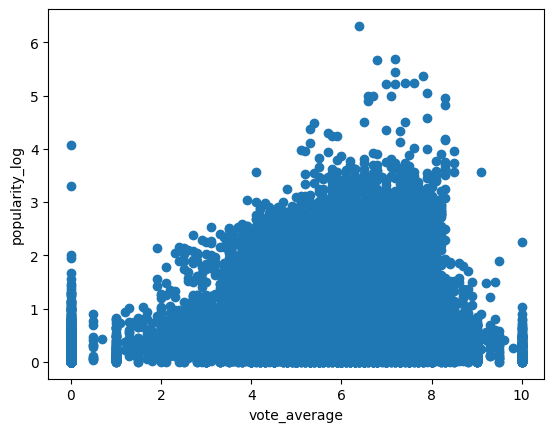

In [186]:
plt.figure()
plt.scatter(X1[:,0],X1[:,1])
plt.xlabel("vote_average")
plt.ylabel("popularity_log")
plt.show()

Okay, vue la façons dont ces données sont réparties, KMeans et GaussianMixture feraient pas l'affaire, on va opter pour DBSCAN.

On commence par la détermination des hyper-paramètre de DBSCAN.

In [187]:
from sklearn.neighbors import NearestNeighbors

In [188]:
k1=int(np.log(len(X1)))
# nombre min de voisin q'un point doit avoir pour être considérer comme un corepoint.

In [189]:
nbrs=NearestNeighbors(n_neighbors=k1).fit(X1)
distance,_=nbrs.kneighbors(X1)

In [190]:
distance_k=distance[:,-1]
distance_k=np.sort(distance_k)[::-1]

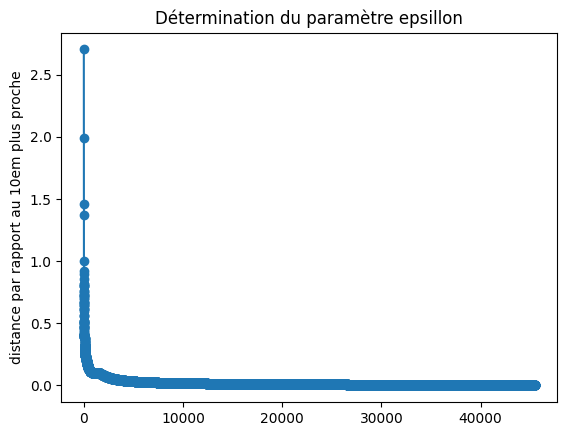

In [191]:
plt.figure()
plt.plot([i for i in range(len(X1))],distance_k,marker='o')
plt.ylabel(f'distance par rapport au {k1}em plus proche')
plt.title("Détermination du paramètre epsillon")
plt.show()

Et bien, la valeur optimale pour eps se trouverait entre 0 et 0.5

In [192]:
from sklearn.cluster import DBSCAN

In [193]:
from sklearn.metrics import davies_bouldin_score,silhouette_score

davies_bouldin_score pour eps=0.1: 3.589611827704693
silhouette_score: pour eps=0.1 -0.02787394931247647

davies_bouldin_score pour eps=0.2: 1.1369661398536683
silhouette_score: pour eps=0.2 0.42225168104532484

davies_bouldin_score pour eps=0.3: 0.9932831851457583
silhouette_score: pour eps=0.3 0.5435439250553532



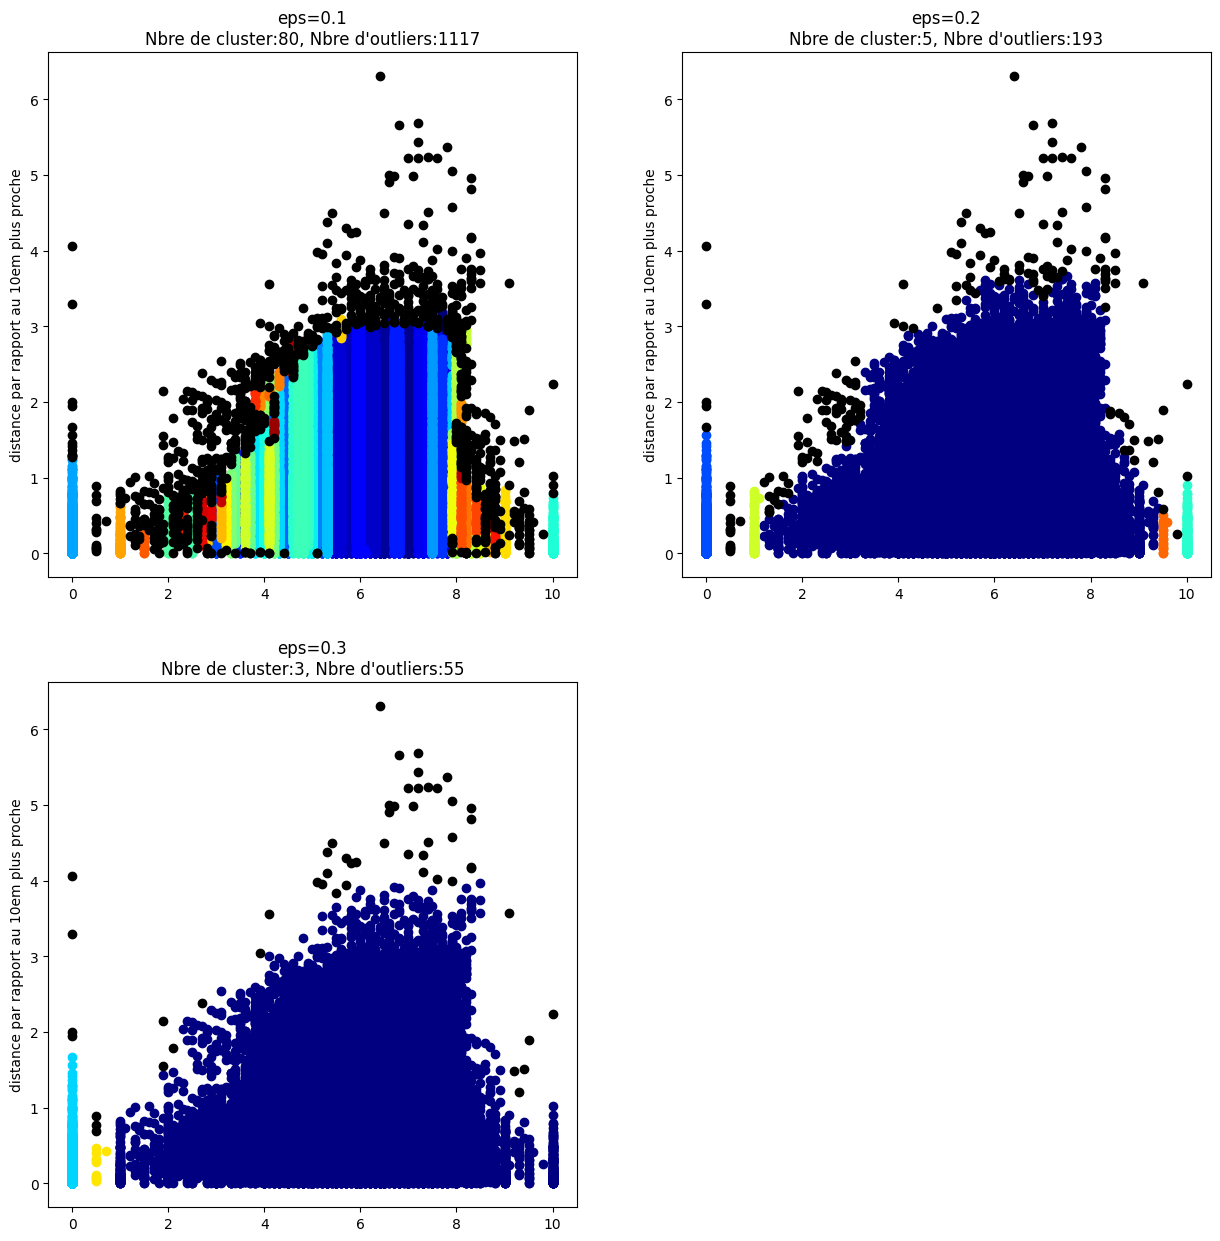

In [194]:
eps_values=[0.1,0.2,0.3]
plt.figure(figsize=(15,15))
for e in range(len(eps_values)):
    dbscan=DBSCAN(min_samples=k1,eps=eps_values[e])
    labels=dbscan.fit_predict(X1)
    unique_label=set(labels)
    n_clusters=len(unique_label) -(1 if -1 in unique_label else 0)
    n_outliers=list(labels).count(-1)
    colors=[plt.cm.jet(each) for each in np.linspace(0,1,len(unique_label))]
    for label,color in zip(unique_label,colors):
        if label==-1:
            color='k'
        plt.subplot(2,2,e+1)
        plt.scatter(X1[labels==label,0],X1[labels==label,1],c=[color])
        plt.title(f"eps={eps_values[e]}\nNbre de cluster:{n_clusters}, Nbre d'outliers:{n_outliers}")
        #plt.legend()
    print(f'davies_bouldin_score pour eps={eps_values[e]}:',davies_bouldin_score(X1,labels))
    print(f'silhouette_score: pour eps={eps_values[e]}',silhouette_score(X1,labels))
    print()
    plt.ylabel(f'distance par rapport au {k1}em plus proche')
plt.show()

Les scores davies_bouldin_score et silhouette_score sont très faibles, les représentations graphiques nous confirment même que les clusters sont mal définis. On va définir une autre plage de valeurs pour eps.

davies_bouldin_score pour eps=0.25: 1.0092709587070217
silhouette_score: pour eps=0.25 0.4735458513361344

davies_bouldin_score pour eps=0.35: 0.9670793823837606
silhouette_score: pour eps=0.35 0.5809770936566175

davies_bouldin_score pour eps=0.4: 0.7756247420862676
silhouette_score: pour eps=0.4 0.5698632910216913



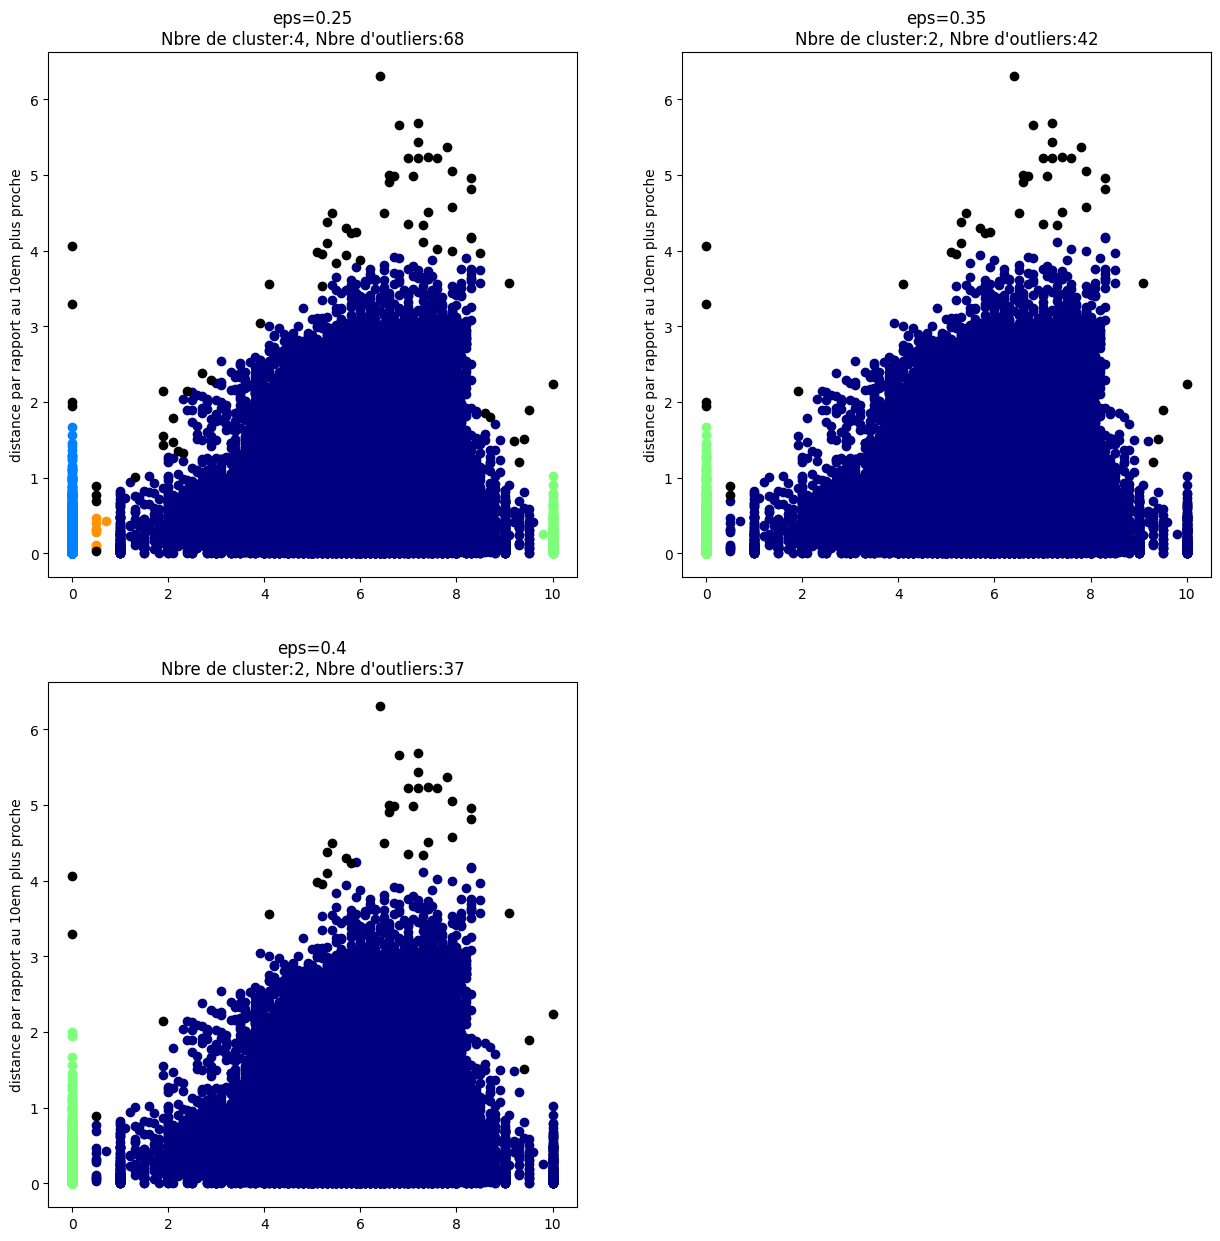

In [195]:
eps_values=[0.25,0.35,0.4]
plt.figure(figsize=(15,15))
for e in range(len(eps_values)):
    dbscan=DBSCAN(min_samples=k1,eps=eps_values[e])
    labels=dbscan.fit_predict(X1)
    unique_label=set(labels)
    n_clusters=len(unique_label) -(1 if -1 in unique_label else 0)
    n_outliers=list(labels).count(-1)
    colors=[plt.cm.jet(each) for each in np.linspace(0,1,len(unique_label))]
    for label,color in zip(unique_label,colors):
        if label==-1:
            color='k'
        plt.subplot(2,2,e+1)
        plt.scatter(X1[labels==label,0],X1[labels==label,1],c=[color],label=f'cluster {label}')
        plt.title(f"eps={eps_values[e]}\nNbre de cluster:{n_clusters}, Nbre d'outliers:{n_outliers}")
        #plt.legend()
    print(f'davies_bouldin_score pour eps={eps_values[e]}:',davies_bouldin_score(X1,labels))
    print(f'silhouette_score: pour eps={eps_values[e]}',silhouette_score(X1,labels))
    print()
    plt.ylabel(f'distance par rapport au {k1}em plus proche')
plt.show()

On observe une amélioration aussi bien au niveau des métriques de performances que sur les représentations graphiques.

davies_bouldin_score pour eps=0.45: 0.645654337861368
silhouette_score: pour eps=0.45 0.5736686052711358

davies_bouldin_score pour eps=0.5: 0.6793980422425755
silhouette_score: pour eps=0.5 0.5804759480733437

davies_bouldin_score pour eps=0.55: 2.4663886247126166
silhouette_score: pour eps=0.55 0.4938927516212778

davies_bouldin_score pour eps=0.6: 2.5735527645278005
silhouette_score: pour eps=0.6 0.49610773046736706



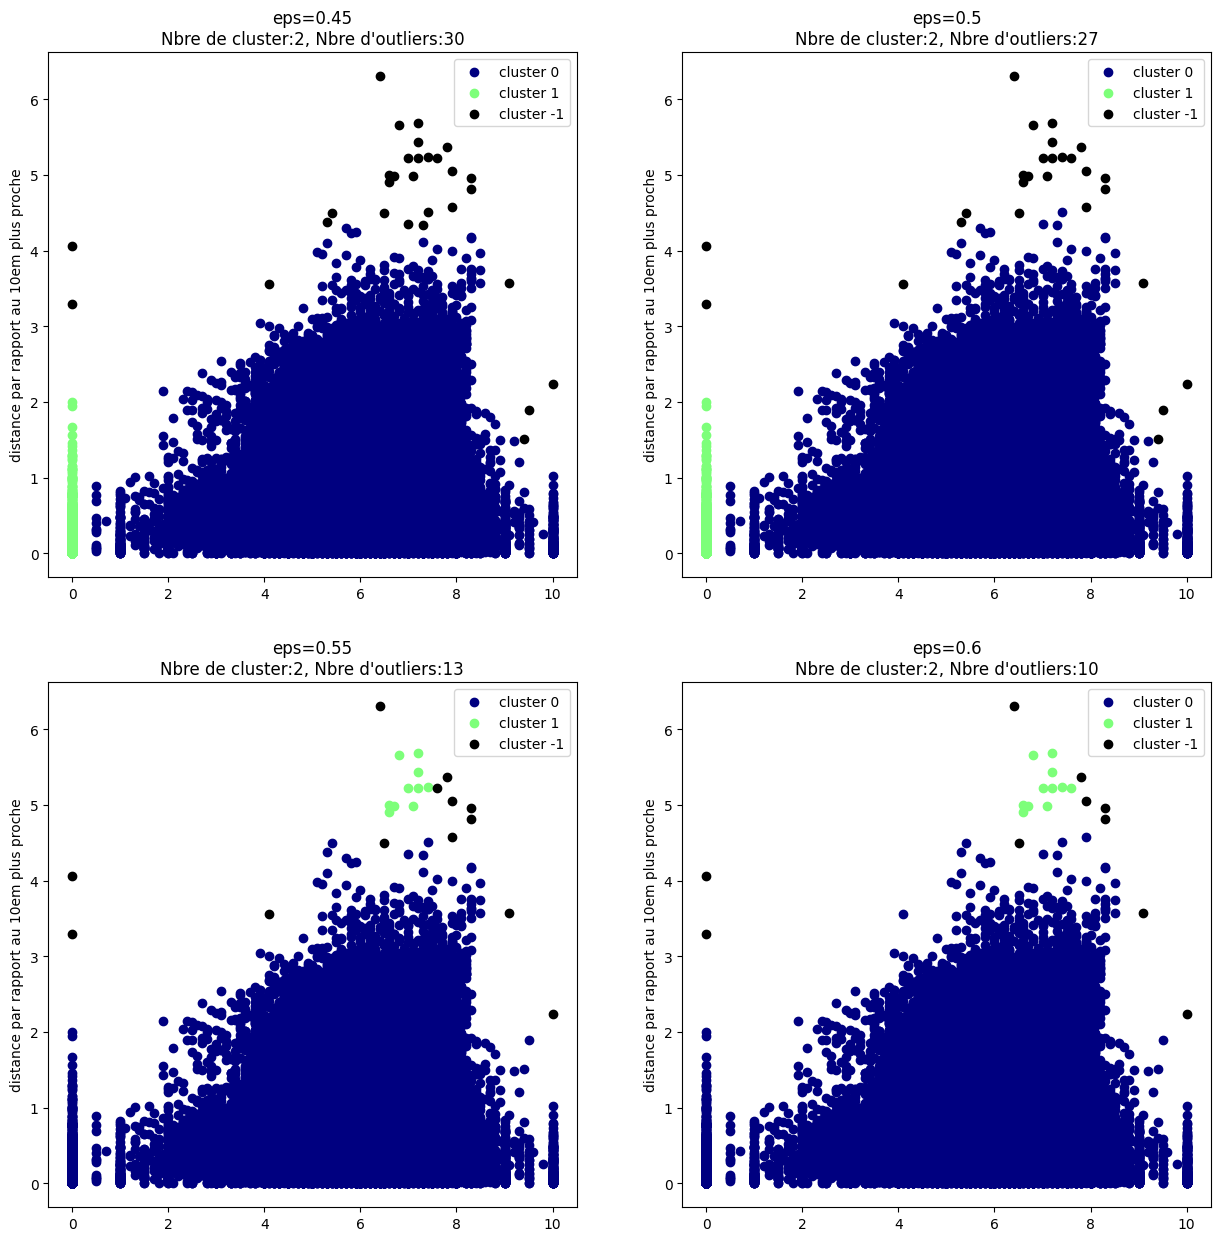

In [196]:
eps_values=[0.45,0.5,0.55,0.6]
plt.figure(figsize=(15,15))
for e in range(len(eps_values)):
    dbscan=DBSCAN(min_samples=k1,eps=eps_values[e])
    labels=dbscan.fit_predict(X1)
    unique_label=set(labels)
    n_clusters=len(unique_label) -(1 if -1 in unique_label else 0)
    n_outliers=list(labels).count(-1)
    colors=[plt.cm.jet(each) for each in np.linspace(0,1,len(unique_label))]
    for label,color in zip(unique_label,colors):
        if label==-1:
            color='k'
        plt.subplot(2,2,e+1)
        plt.scatter(X1[labels==label,0],X1[labels==label,1],c=[color],label=f'cluster {label}')
        plt.title(f"eps={eps_values[e]}\nNbre de cluster:{n_clusters}, Nbre d'outliers:{n_outliers}")
        plt.legend()
    print(f'davies_bouldin_score pour eps={eps_values[e]}:',davies_bouldin_score(X1,labels))
    print(f'silhouette_score: pour eps={eps_values[e]}',silhouette_score(X1,labels))
    print()
    plt.ylabel(f'distance par rapport au {k1}em plus proche')
plt.show()

Pas mal, eps=0.45 semble être une très bonne option:
davies_bouldin_score pour eps=0.45: 0.645654337861368
silhouette_score: pour eps=0.45 0.5736686052711358
Assez bonne performence.
Mais bon, essayons tout de même d'avoir mieux que ça en terme de performance.

davies_bouldin_score pour eps=0.46: 0.6552911118897727
silhouette_score: pour eps=0.46 0.5759496372165185

davies_bouldin_score pour eps=0.47: 0.6552911118897727
silhouette_score: pour eps=0.47 0.5759496372165185

davies_bouldin_score pour eps=0.48: 0.6793980422425755
silhouette_score: pour eps=0.48 0.5804759480733437

davies_bouldin_score pour eps=0.49: 0.6793980422425755
silhouette_score: pour eps=0.49 0.5804759480733437



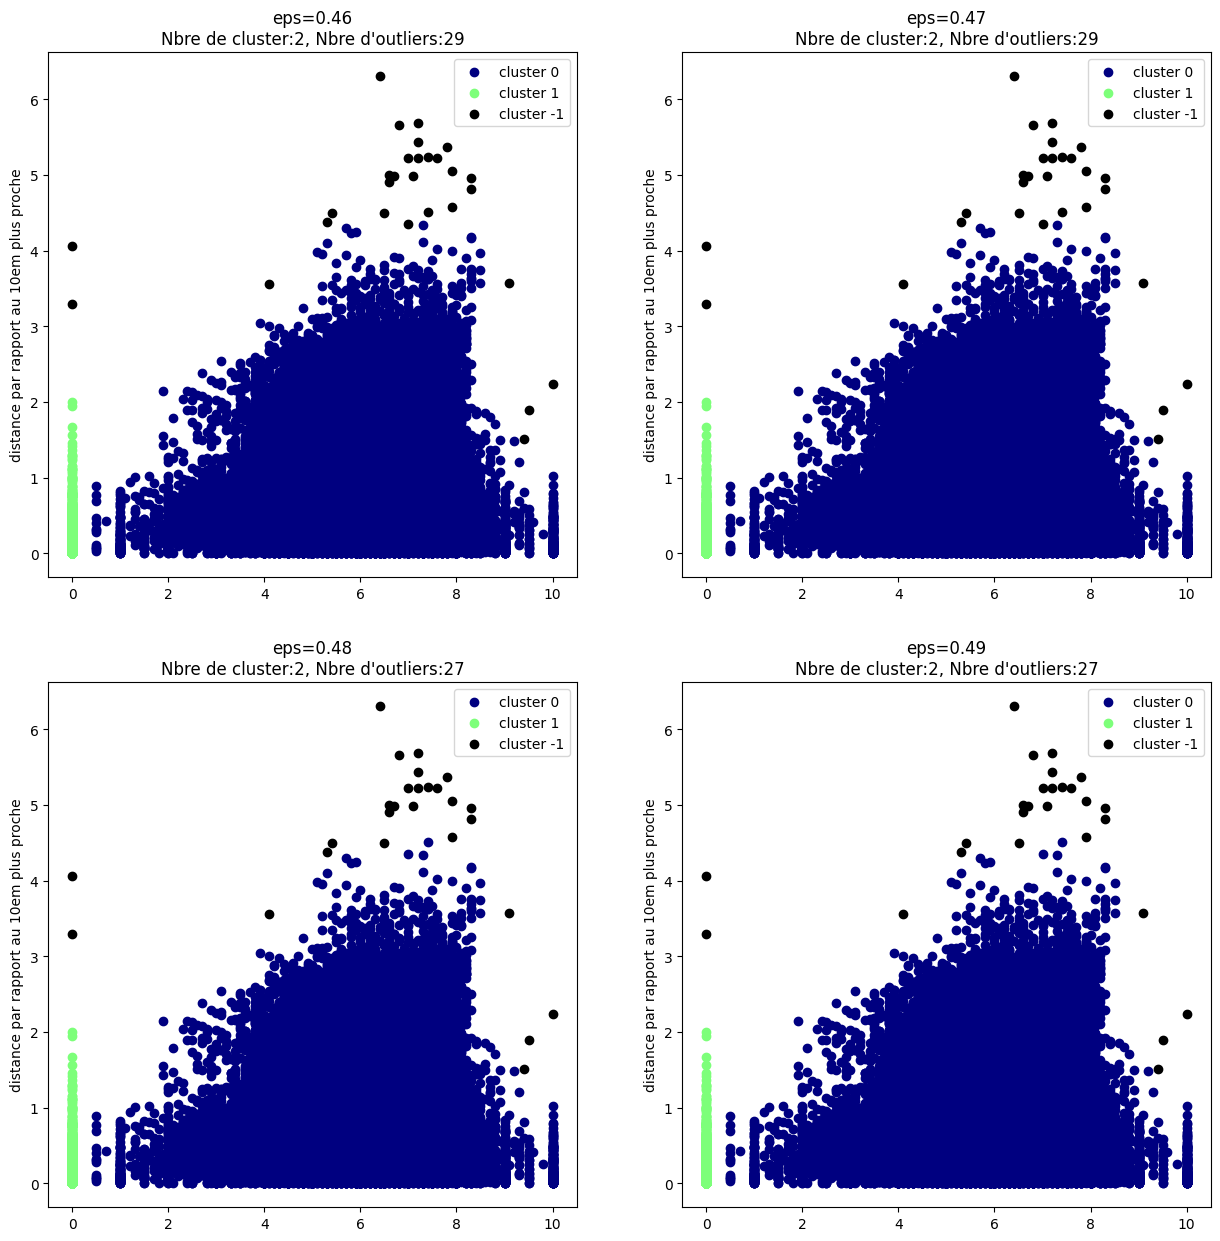

In [197]:
eps_values=[0.46,0.47,0.48,0.49]
plt.figure(figsize=(15,15))
for e in range(len(eps_values)):
    dbscan=DBSCAN(min_samples=k1,eps=eps_values[e])
    labels=dbscan.fit_predict(X1)
    unique_label=set(labels)
    n_clusters=len(unique_label) -(1 if -1 in unique_label else 0)
    n_outliers=list(labels).count(-1)
    colors=[plt.cm.jet(each) for each in np.linspace(0,1,len(unique_label))]
    for label,color in zip(unique_label,colors):
        if label==-1:
            color='k'
        plt.subplot(2,2,e+1)
        plt.scatter(X1[labels==label,0],X1[labels==label,1],c=[color],label=f'cluster {label}')
        plt.title(f"eps={eps_values[e]}\nNbre de cluster:{n_clusters}, Nbre d'outliers:{n_outliers}")
        plt.legend()
    print(f'davies_bouldin_score pour eps={eps_values[e]}:',davies_bouldin_score(X1,labels))
    print(f'silhouette_score: pour eps={eps_values[e]}',silhouette_score(X1,labels))
    print()
    plt.ylabel(f'distance par rapport au {k1}em plus proche')
plt.show()

On va prendre eps=0.46

davies_bouldin_score pour eps=0.46: 0.6552911118897727

silhouette_score: pour eps=0.46 0.5759496372165185

In [198]:
dbscan=DBSCAN(eps=0.46,min_samples=k1)
labels=dbscan.fit_predict(X1)
labels

array([0, 0, 0, ..., 0, 1, 1], shape=(45451,))

In [199]:
df['clt_Pop_VoteAvg']=labels
#clt_Pop_VoteAvg : cluster Popularity and vote_average

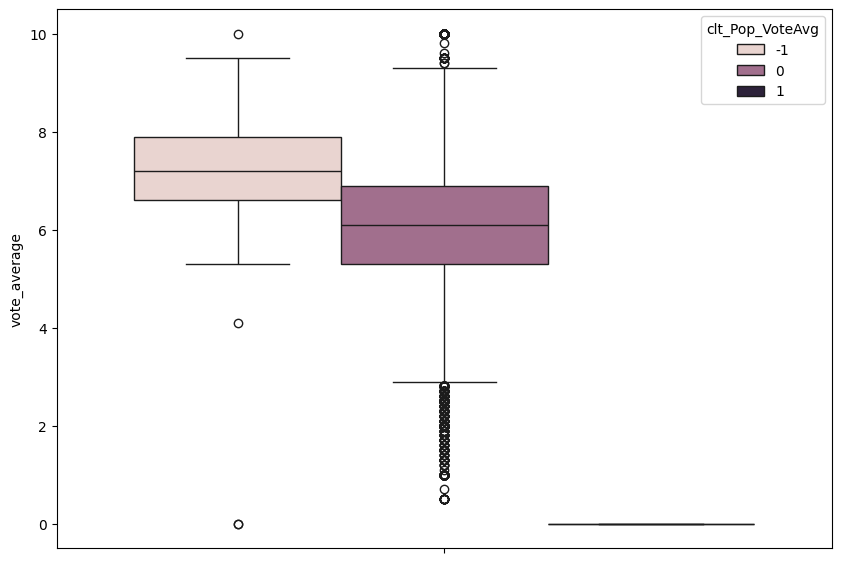

In [200]:
plt.figure(figsize=(10,7))
sns.boxplot(y=df['vote_average'],hue=df['clt_Pop_VoteAvg'])
plt.show()

Système de recommendation v2

In [201]:
sim_cosine=cosine_similarity(df[['popularity_log','vote_average','vote_count_log']].values)

In [202]:
sim_cosine

array([[1.        , 0.99996859, 0.97446365, ..., 0.92974659, 0.26199432,
        0.26199432],
       [0.99996859, 1.        , 0.97359282, ..., 0.92726976, 0.26770876,
        0.26770876],
       [0.97446365, 0.97359282, 1.        , ..., 0.97843295, 0.30552148,
        0.30552148],
       ...,
       [0.92974659, 0.92726976, 0.97843295, ..., 1.        , 0.14903052,
        0.14903052],
       [0.26199432, 0.26770876, 0.30552148, ..., 0.14903052, 1.        ,
        1.        ],
       [0.26199432, 0.26770876, 0.30552148, ..., 0.14903052, 1.        ,
        1.        ]], shape=(45451, 45451))

In [203]:
def recommand_movie2(df,movie_id,similarity,cluster_weight=0.2,top=5):
    if movie_id not in df.index:
        return f'impossible de trouver le film d\'identifiant {movie_id}.'
        
    sim_scores=list( enumerate(similarity[movie_id]) )
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)[1:]
    
    movies_indice=[i[0] for i in sim_scores[:top*2]]
    similar_movies=df.loc[movies_indice].copy()

    base_cluster=df.loc[movie_id,'clt_Pop_VoteAvg'] # récupérer le cluster du film
    similar_movies['cluster_match']=similar_movies['clt_Pop_VoteAvg'].apply(lambda x: 1+cluster_weight if x==base_cluster else 1-cluster_weight)
    similar_movies['final_score']=similar_movies['cluster_match']*similar_movies['vote_average']

    recommand_movies=similar_movies.sort_values(by='final_score',ascending=False).head(top)
    return recommand_movies[['vote_average','clt_Pop_VoteAvg','final_score','popularity_log','vote_count_log']]

Le but de la fonction est d'ajouter une influence sur la recommandation. Si l'une des recommandations est dans le même cluster que le film de base, alors son score sera augmenté.

In [204]:
recommand_movie2(df,0,sim_cosine) 

,vote_average,clt_Pop_VoteAvg,final_score,popularity_log,vote_count_log
30309,7.9,0,9.48,3.218299,8.815518
22056,7.6,0,9.12,3.074764,8.441176
11567,7.5,0,9.00,3.068426,8.414274
13219,7.3,0,8.76,2.941003,8.131237
38491,7.0,0,8.40,2.837651,7.776115


In [205]:
recommand_movie2(df,15424554,sim_cosine)

"impossible de trouver le film d'identifiant 15424554."

In [206]:
recommand_movie2(df,292,sim_cosine)

,vote_average,clt_Pop_VoteAvg,final_score,popularity_log,vote_count_log
41959,5.1,0,4.08,3.006961,5.572154
17504,4.5,0,3.60,2.622055,4.962845
3765,4.4,0,3.52,2.520190,4.682131
9122,4.4,0,3.52,2.693142,4.744932
29901,4.2,0,3.36,2.613597,4.653960


In [207]:
for i in df[df['clt_Pop_VoteAvg']==-1].index:
    print('index',i,'\n',recommand_movie2(df,i,sim_cosine))

index 292 
        vote_average  clt_Pop_VoteAvg  final_score  popularity_log  \
41959           5.1                0         4.08        3.006961   
17504           4.5                0         3.60        2.622055   
3765            4.4                0         3.52        2.520190   
9122            4.4                0         3.52        2.693142   
29901           4.2                0         3.36        2.613597   

       vote_count_log  
41959        5.572154  
17504        4.962845  
3765         4.682131  
9122         4.744932  
29901        4.653960  
index 536 
        vote_average  clt_Pop_VoteAvg  final_score  popularity_log  \
43676           5.6                0         4.48        3.231513   
1884            5.5                0         4.40        3.239285   
7281            4.8                0         3.84        2.645764   
26030           4.8                0         3.84        2.698735   
11495           4.6                0         3.68        2.649000   

  

Nous y sommes, le système est fait et il semble bien tourné, essayons d'évaluer ses performances avec un mean_average_precision

In [ ]:
def mean_average_precision_cluster(df, recommand_func, similarity_matrix, k=10, n_users=100):
    import numpy as np
    

    film_indices = df.index.tolist()
    np.random.shuffle(film_indices)  # On prend des films au hasard

    average_precisions = []

    for film_idx in film_indices[:n_users]:
        base_cluster = df.loc[film_idx, "clt_Pop_VoteAvg"]

        # "Vérité terrain" : les autres films dans le même cluster (sauf lui-même)
        true_similar_indices = set(df[df["clt_Pop_VoteAvg"] == base_cluster].index)
        true_similar_indices.discard(film_idx)

        # Utilisation de la fonction de reco
        recommended_df = recommand_func(df, film_idx, similarity_matrix)

        # Si la fonction retourne une erreur ou rien
        if isinstance(recommended_df, str) or recommended_df.empty:
            average_precisions.append(0)
            continue

        recommended_indices = recommended_df.index.tolist()

        # Calcul de la précision moyenne
        hits = 0
        precisions = []
        for i, idx in enumerate(recommended_indices):
            if idx in true_similar_indices:
                hits += 1
                precisions.append(hits / (i + 1))
        if precisions:
            average_precisions.append(np.mean(precisions))
        else:
            average_precisions.append(0)

    return round(np.mean(average_precisions), 3)

In [209]:
mean_average_precision_cluster(df, recommand_movie2, sim_cosine)


np.float64(1.0)

Une précision de 0.997 waouh! Mais est ce normale une telle situation? La fonction recommand movie marche bien ce qui est sûr, bon testons d'autres métriques.

In [210]:
def hit_rate_at_k(df, recommand_func, similarity_matrix, k=5, n_users=100):
    import numpy as np
    hits = 0
    tested = 0

    film_indices = df.index.tolist()
    np.random.shuffle(film_indices)

    for film_idx in film_indices[:n_users]:
        if film_idx not in df.index:
            continue

        base_cluster = df.loc[film_idx, "clt_Pop_VoteAvg"]
        true_similar = set(df[df["clt_Pop_VoteAvg"] == base_cluster].index)
        true_similar.discard(film_idx)

        reco = recommand_func(df, film_idx, similarity_matrix)
        if isinstance(reco, str) or reco.empty:
            continue

        recommended = set(reco.index[:k])
        if len(true_similar & recommended) > 0:
            hits += 1
        tested += 1

    return round(hits / tested, 3) if tested > 0 else 0

In [211]:
hit_score = hit_rate_at_k(df, recommand_movie2, sim_cosine, k=5, n_users=100)
print("Hit Rate @5 :", hit_score)

Hit Rate @5 : 1.0


In [212]:
def precision_at_k(df, recommand_func, similarity_matrix, k=5, n_users=100):
    import numpy as np

    film_indices = df.index.tolist()
    np.random.shuffle(film_indices)

    precisions = []

    for film_idx in film_indices[:n_users]:
        base_cluster = df.loc[film_idx, "clt_Pop_VoteAvg"]

        # Obtenir les recommandations
        recommended_df = recommand_func(df, film_idx, similarity_matrix, top=k)

        if isinstance(recommended_df, str) or recommended_df.empty:
            precisions.append(0)
            continue

        recommended_indices = recommended_df.index
        true_similar_indices = set(df[df["clt_Pop_VoteAvg"] == base_cluster].index)
        true_similar_indices.discard(film_idx)

        hits = sum([1 for idx in recommended_indices if idx in true_similar_indices])
        precision = hits / k
        precisions.append(precision)

    return round(np.mean(precisions), 3)

precision_at_k(df, recommand_movie2, sim_cosine, k=5, n_users=100)

np.float64(1.0)

Nous avons testé plusieurs métriques pour évaluer le second système de recommandation, toutes les métriques s'accordent à dire la même chose: Le modèle fait bien son travail.